## Import Packages

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
style.use('fivethirtyeight')

## Load and Format Data

In [97]:
df = pd.read_csv('avocado.csv')
df.shape

(18249, 14)

In [98]:
df.drop('Unnamed: 0', axis =1, inplace=True)

In [99]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [100]:
#create time series dataframe
df_ts = df[['Date', 'region', 'AveragePrice']]
df_ts.shape

(18249, 3)

In [101]:
df_ts = df_ts[df_ts.region != 'WestTexNewMexico']

In [102]:
df_ts.head()

Date  region  AveragePrice
0  2015-12-27  Albany          1.33
1  2015-12-20  Albany          1.35
2  2015-12-13  Albany          0.93
3  2015-12-06  Albany          1.08
4  2015-11-29  Albany          1.28

## EDA

In [103]:
df_ts.AveragePrice.mean()

1.4086764541699257

In [104]:
df_ts.AveragePrice.min()

0.44

In [105]:
df_ts.AveragePrice.max()

3.25

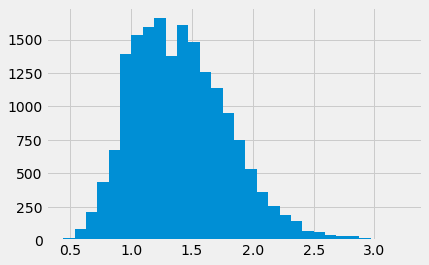

In [106]:
plt.hist(df_ts.AveragePrice, bins = 30)
plt.show()

In [107]:
df_ts.head()

Date  region  AveragePrice
0  2015-12-27  Albany          1.33
1  2015-12-20  Albany          1.35
2  2015-12-13  Albany          0.93
3  2015-12-06  Albany          1.08
4  2015-11-29  Albany          1.28

In [108]:
df_ts['Date'] = pd.to_datetime(df_ts['Date'])

In [109]:
df_ts.loc[0, 'Date'].day_name()

'Sunday'

In [110]:
df_ts['Date'].dt.day_name()

0        Sunday
1        Sunday
2        Sunday
3        Sunday
4        Sunday
          ...  
18232    Sunday
18233    Sunday
18234    Sunday
18235    Sunday
18236    Sunday
Name: Date, Length: 17914, dtype: object

In [111]:
df_ts['Date'].dt.day_name().nunique()

1

In [112]:
df_ts['Date'].min()

Timestamp('2015-01-04 00:00:00')

In [113]:
df_ts['Date'].max()

Timestamp('2018-03-25 00:00:00')

In [114]:
df_ts['Date'].max() - df_ts['Date'].min()

Timedelta('1176 days 00:00:00')

df has weekly average prices reported every sunday for 1176 days

In [115]:
df_ts.set_index('Date', inplace=True)

In [116]:
df_ts['2017']

region  AveragePrice
Date                            
2017-12-31  Albany          1.47
2017-12-24  Albany          1.45
2017-12-17  Albany          1.43
2017-12-10  Albany          1.29
2017-12-03  Albany          1.39
...            ...           ...
2017-01-29    West          1.29
2017-01-22    West          1.20
2017-01-15    West          1.06
2017-01-08    West          1.09
2017-01-01    West          1.19

[5618 rows x 2 columns]

In [117]:
df_ts.region.nunique()

53

there are 54 defined regions defined in the df

In [118]:
ntnlmean = df_ts['AveragePrice'].resample('M').mean()

Text(0.5, 1.0, 'Price vs. Time')

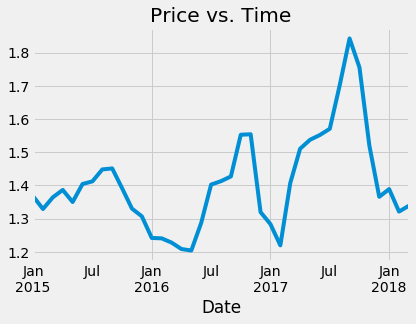

In [119]:
ntnlmean.plot()
plt.title('Price vs. Time')

## Time Series Analysis

In [132]:
df_ts.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West'], dtype=object)

In [133]:
df_cali = df_ts[df_ts['region'] == 'California']

In [134]:
df_cali

region  AveragePrice
Date                                
2015-12-27  California          0.90
2015-12-20  California          0.94
2015-12-13  California          0.87
2015-12-06  California          0.78
2015-11-29  California          0.91
...                ...           ...
2018-02-04  California          1.56
2018-01-28  California          1.87
2018-01-21  California          1.69
2018-01-14  California          1.61
2018-01-07  California          1.95

[338 rows x 2 columns]

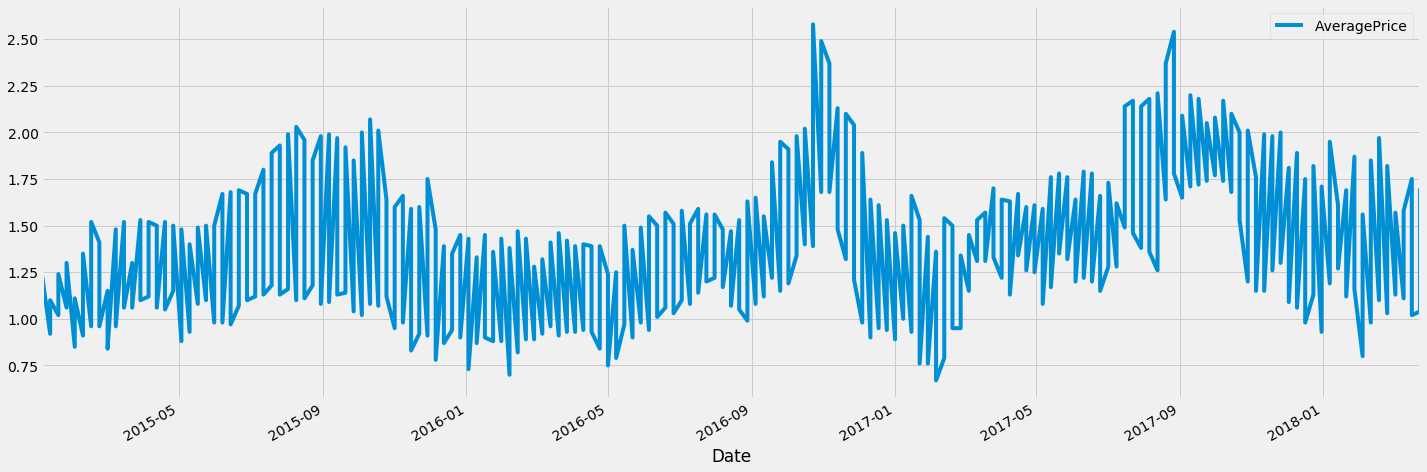

In [136]:
df_cali.plot(figsize = (22,8))
plt.show()

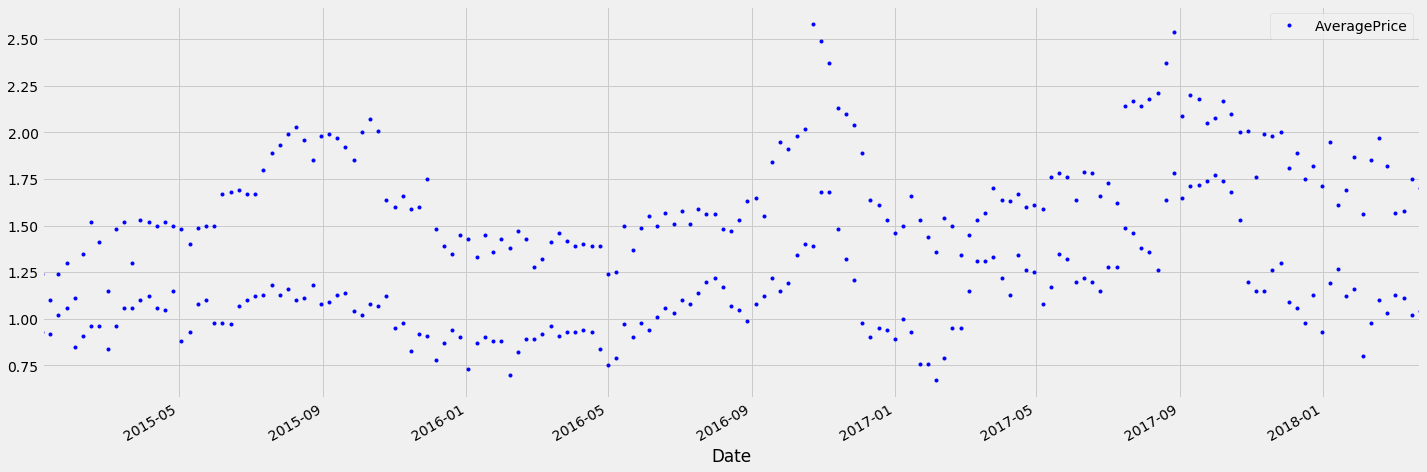

In [137]:
df_cali.plot(figsize = (22,8), style = 'b.')
plt.show()

In [124]:
by_region = df_ts.groupby('region')

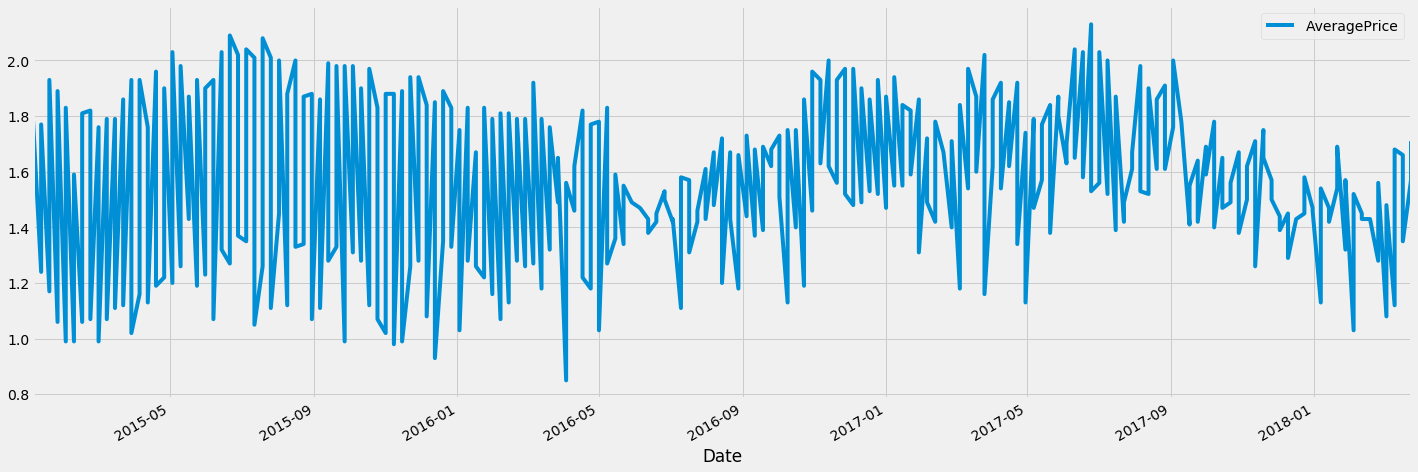

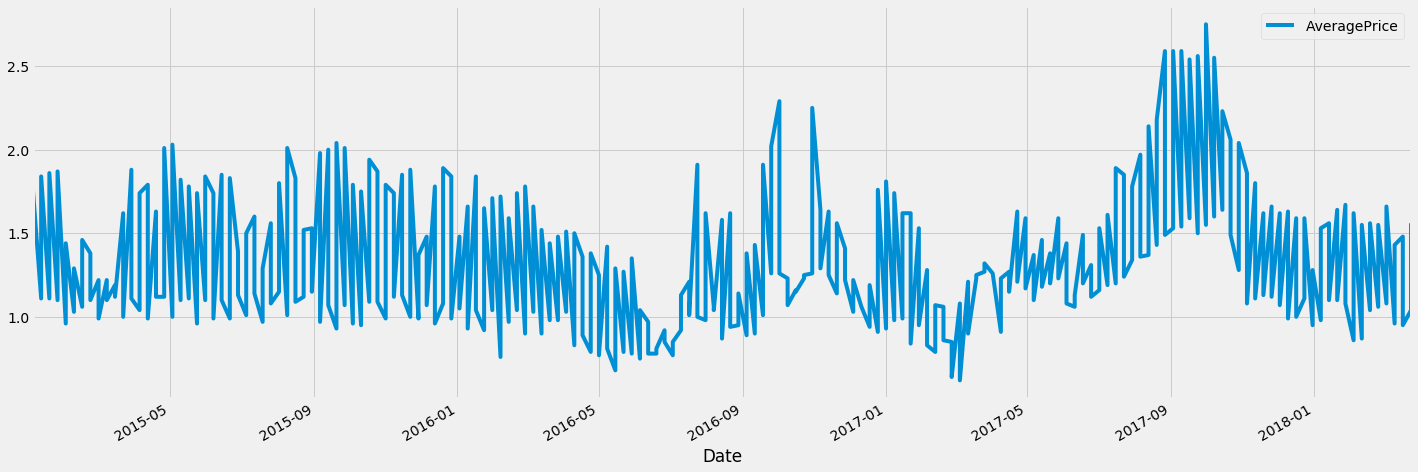

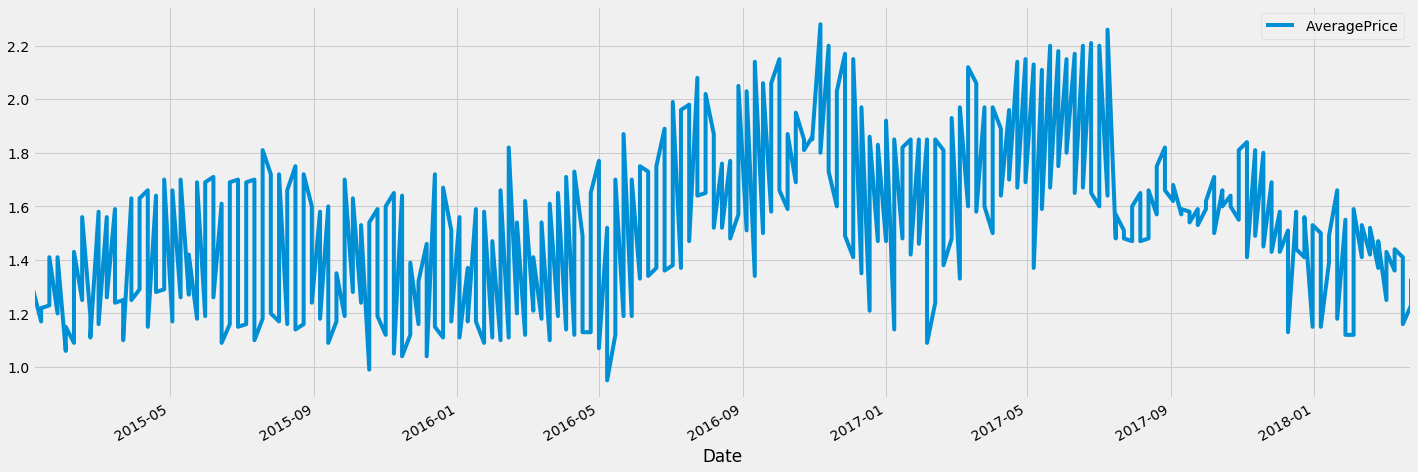

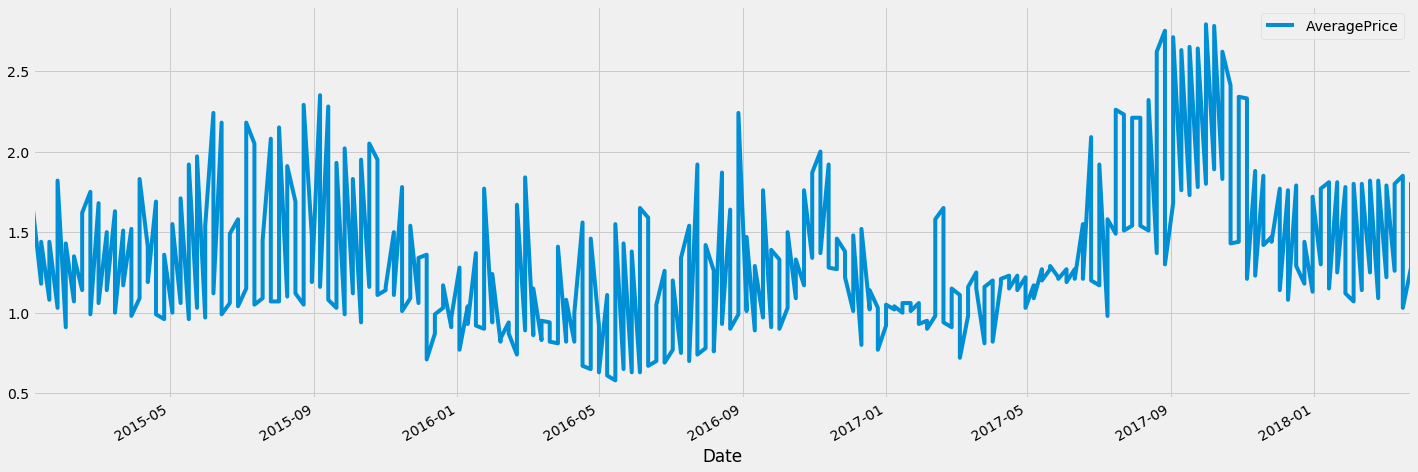

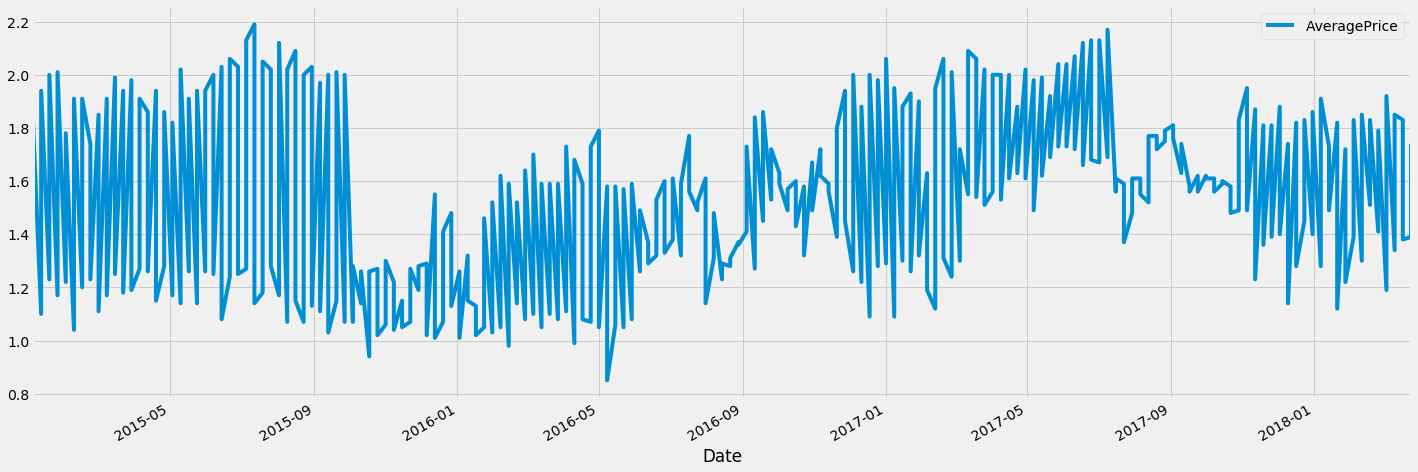

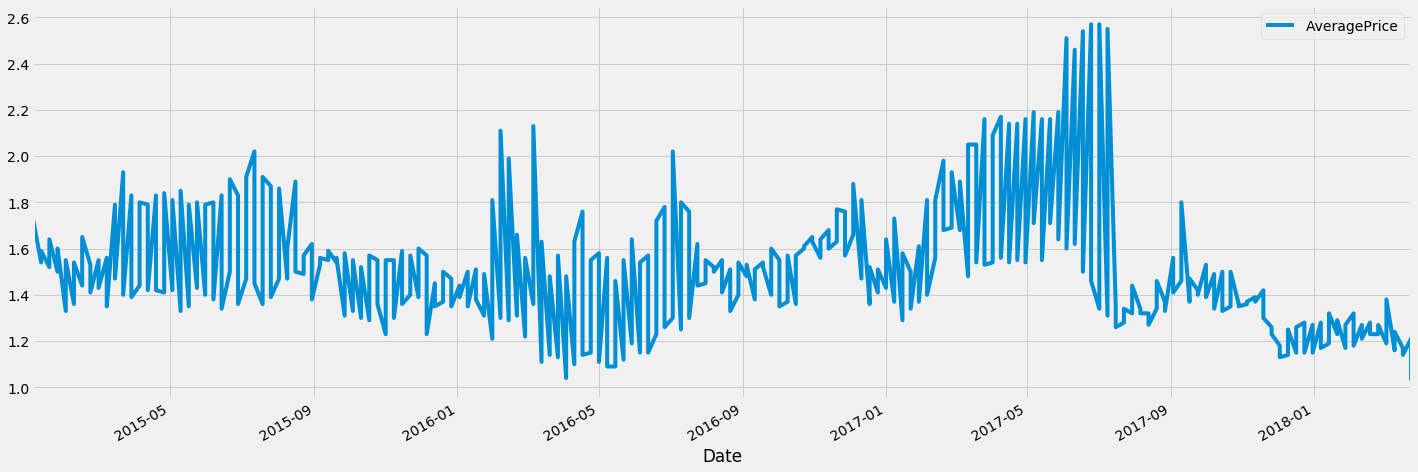

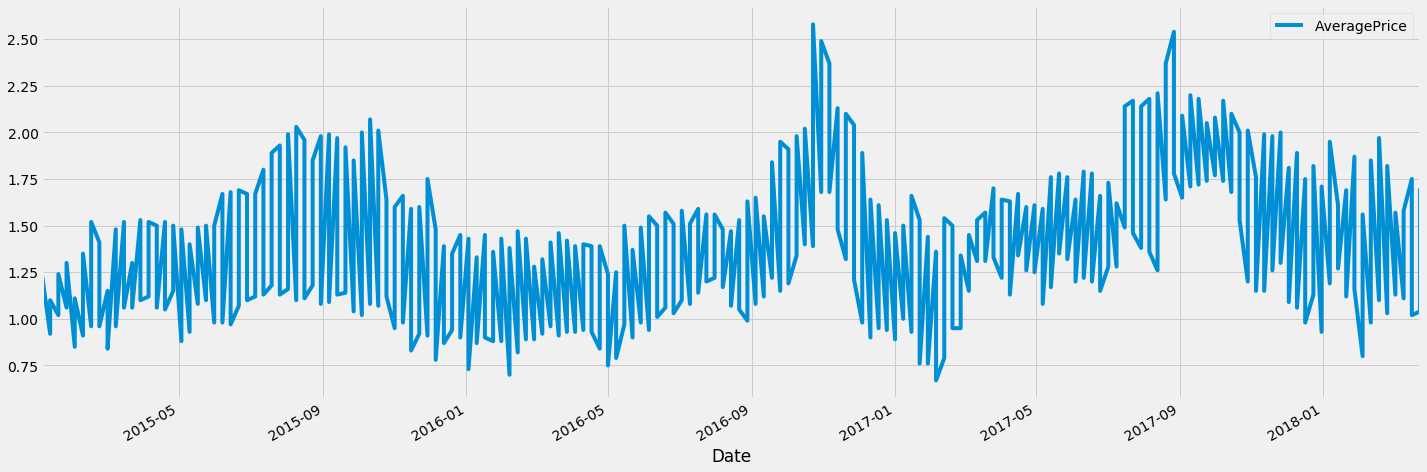

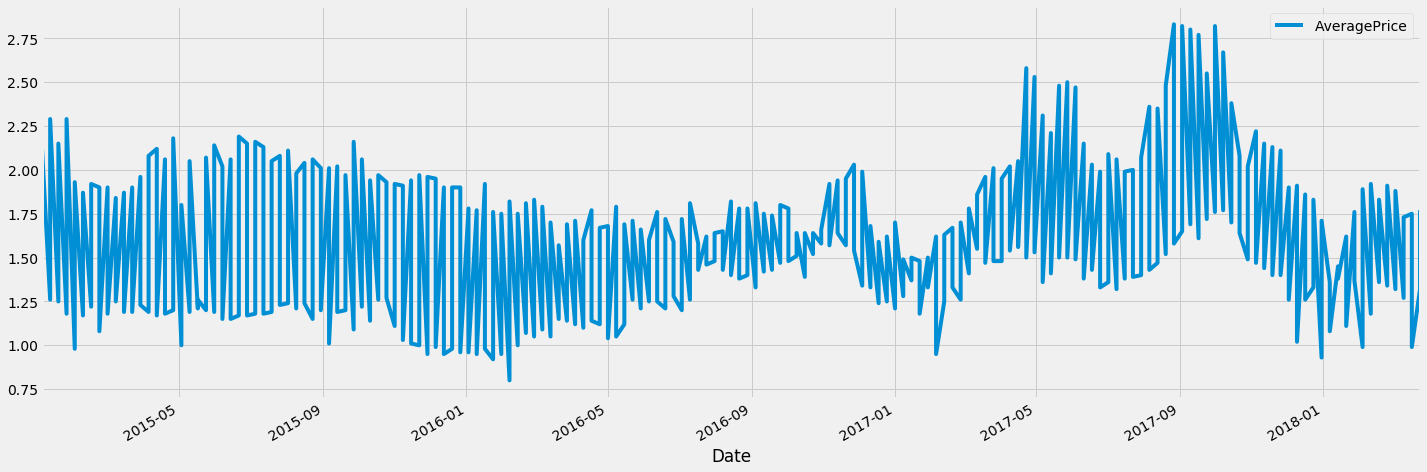

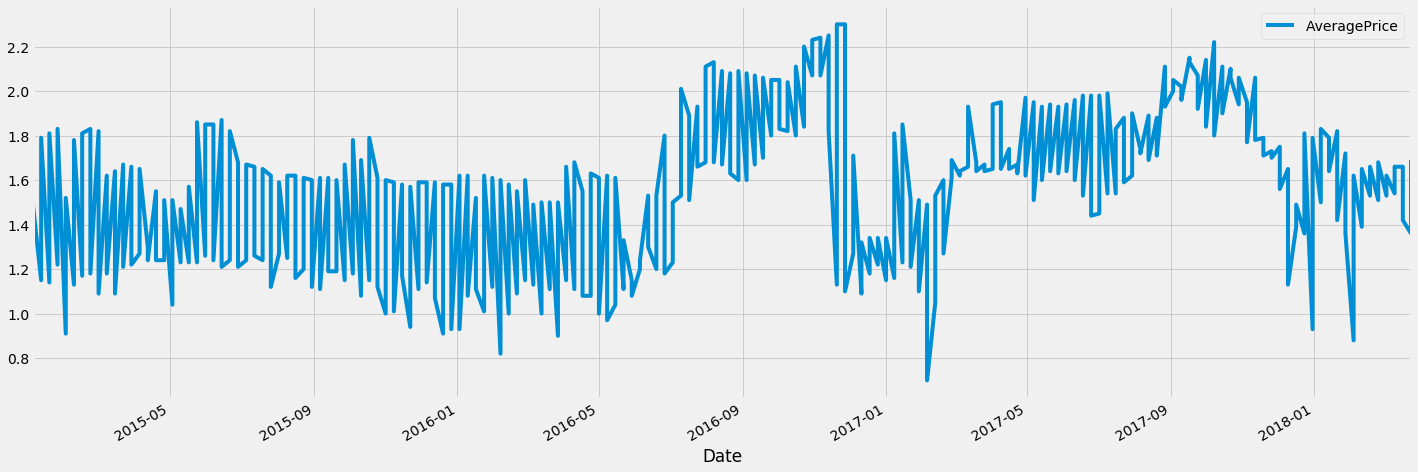

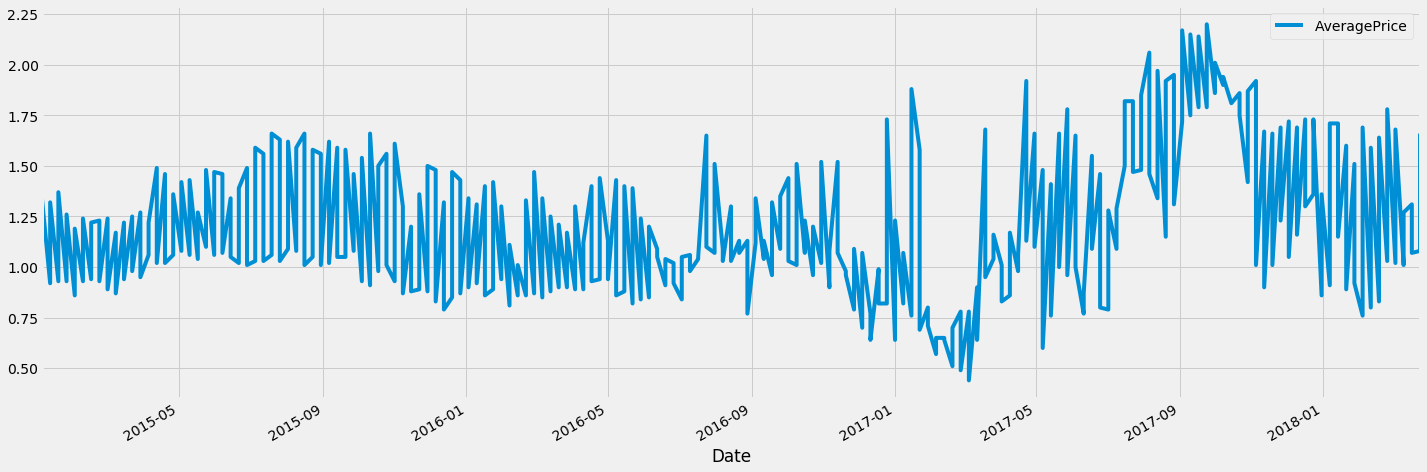

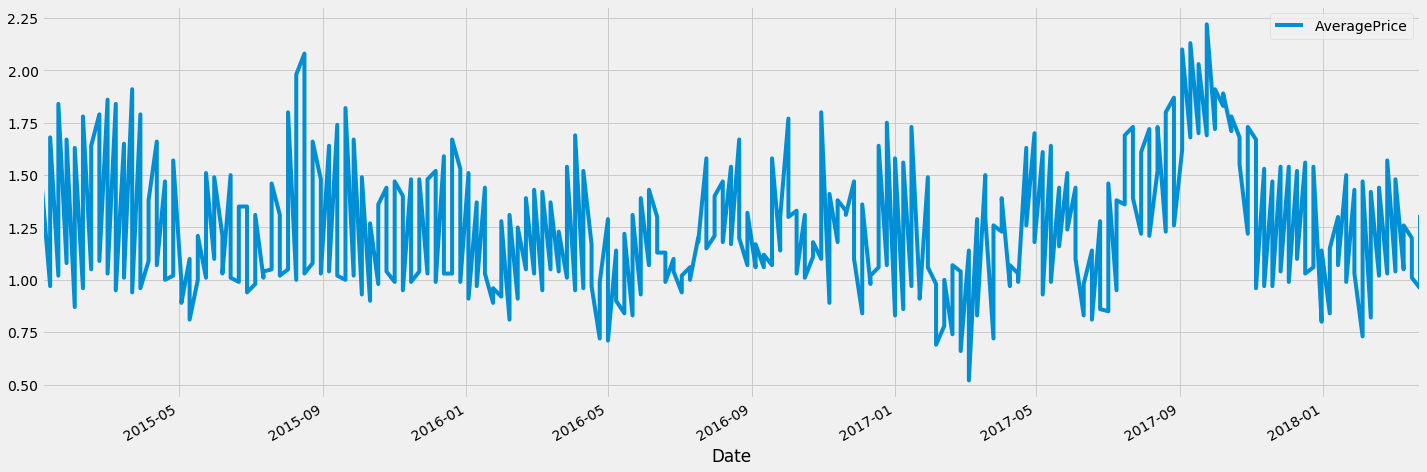

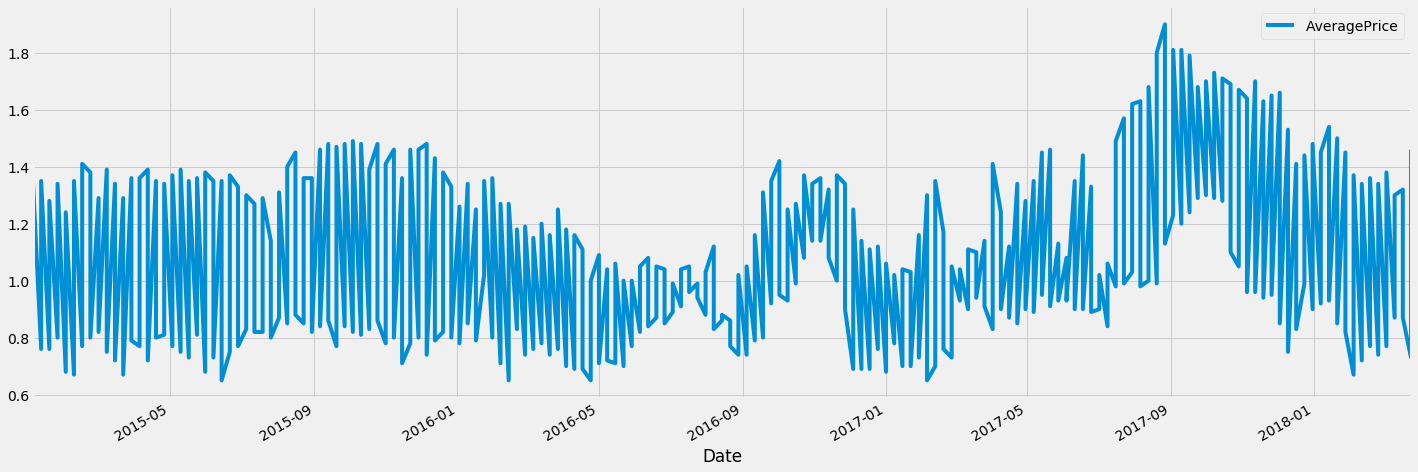

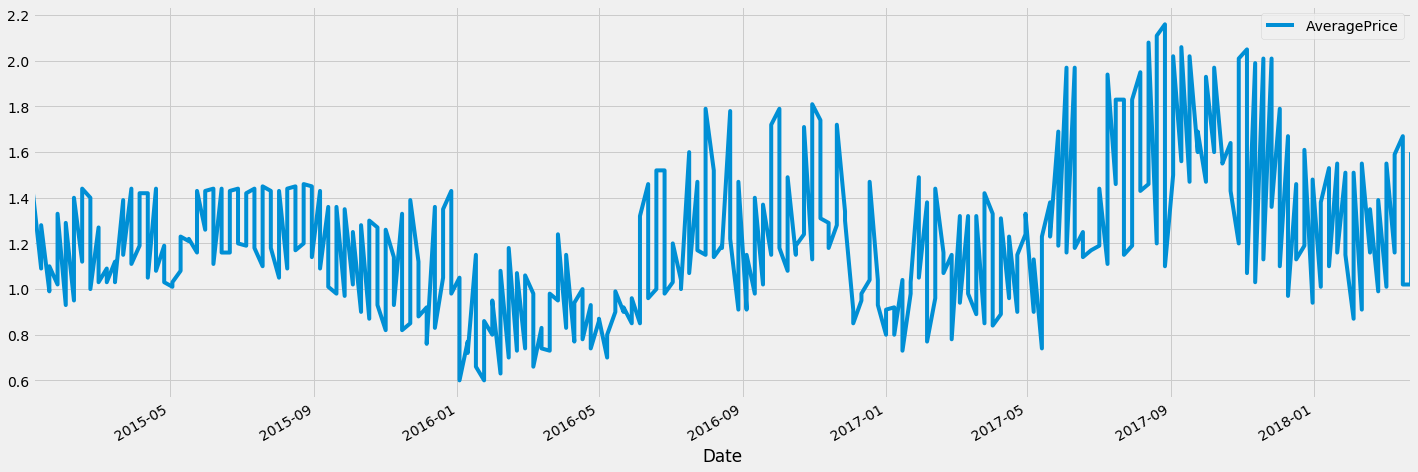

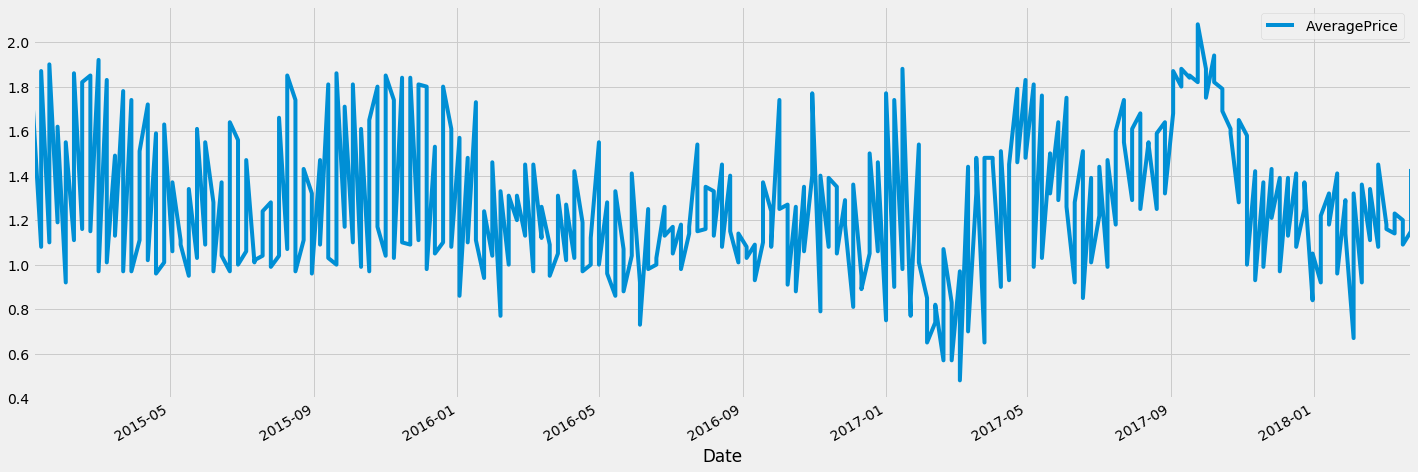

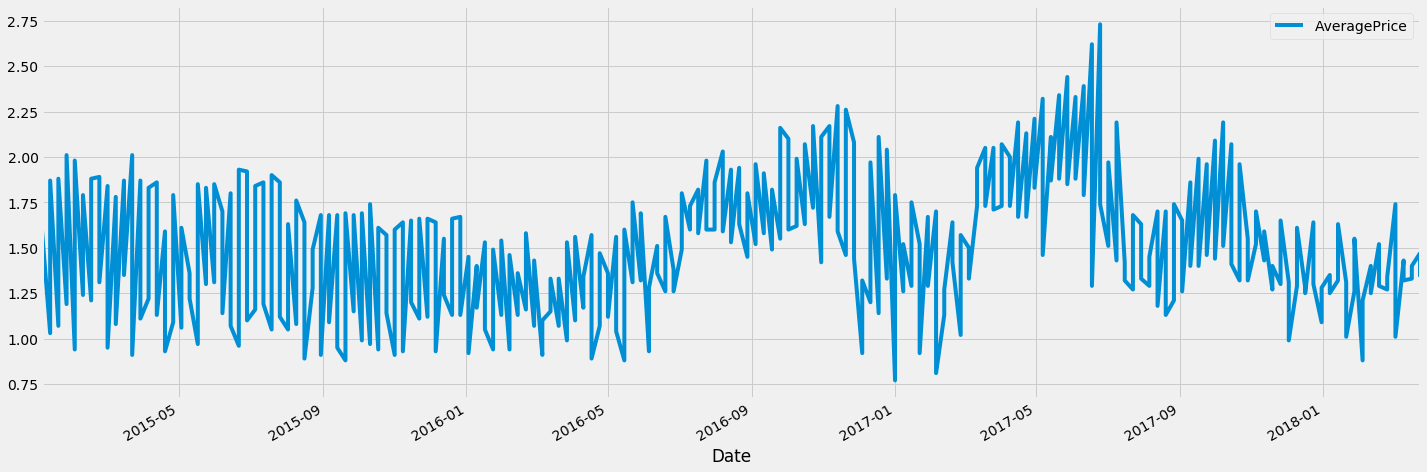

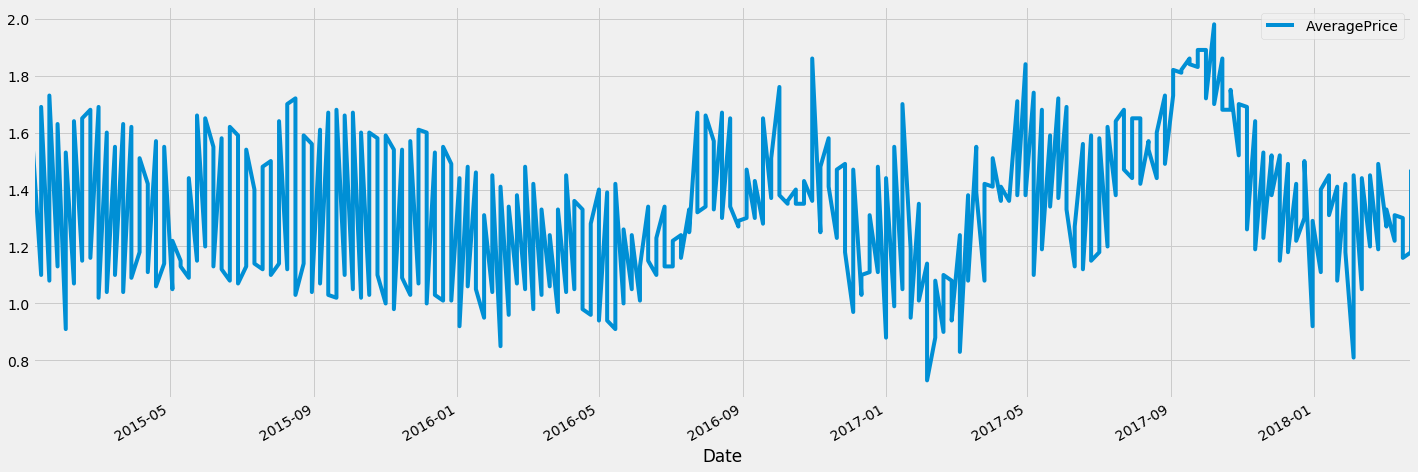

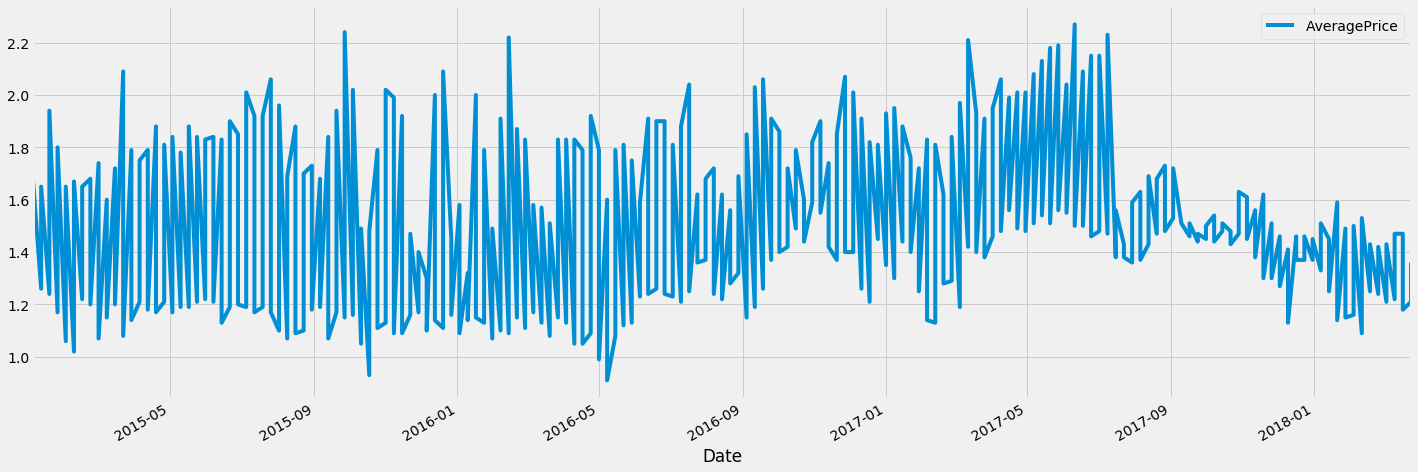

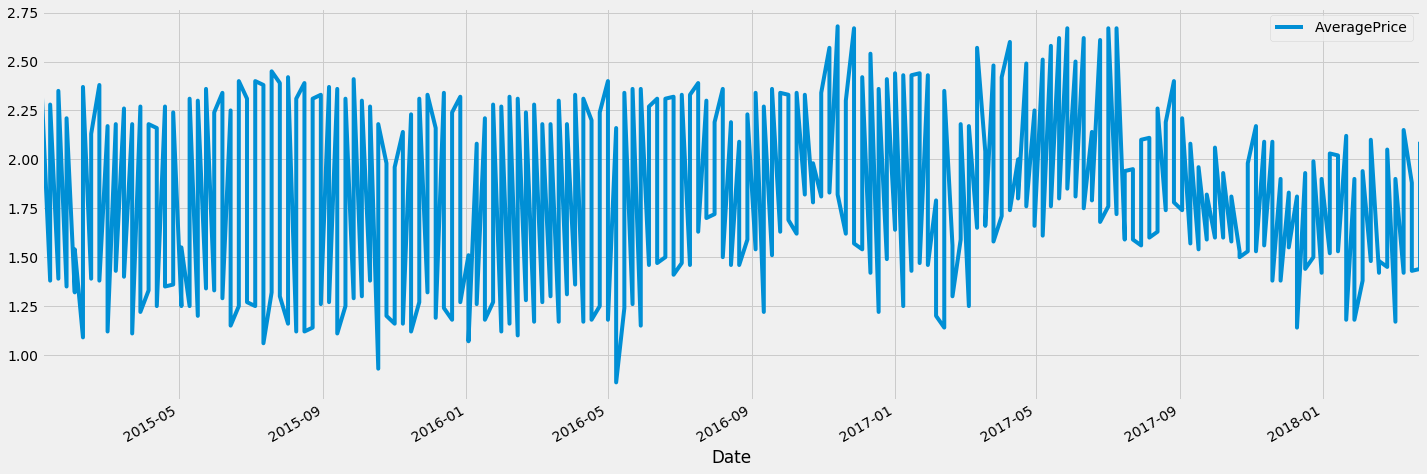

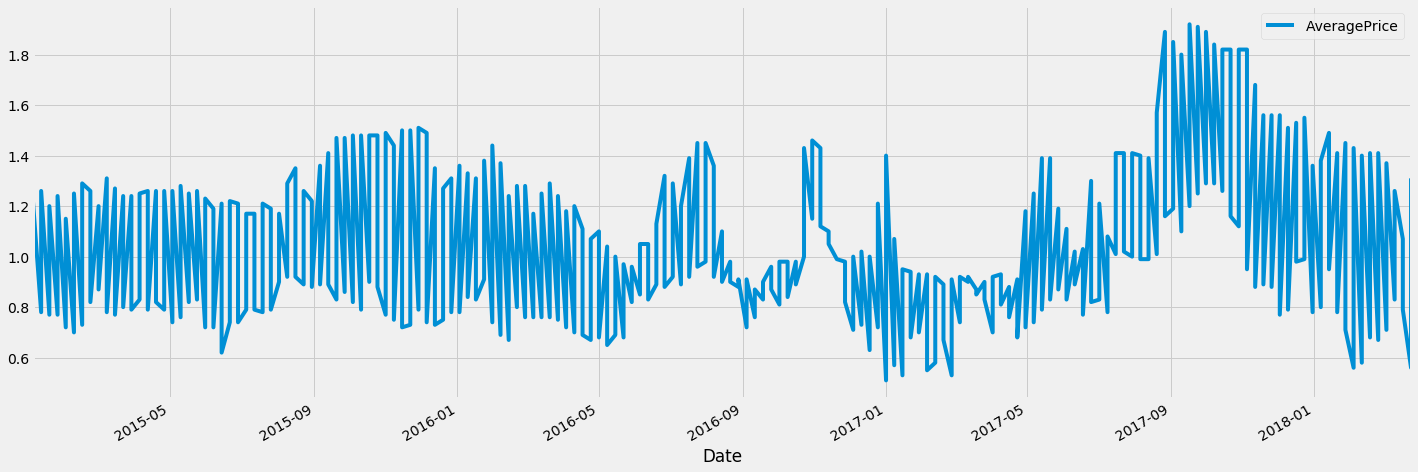

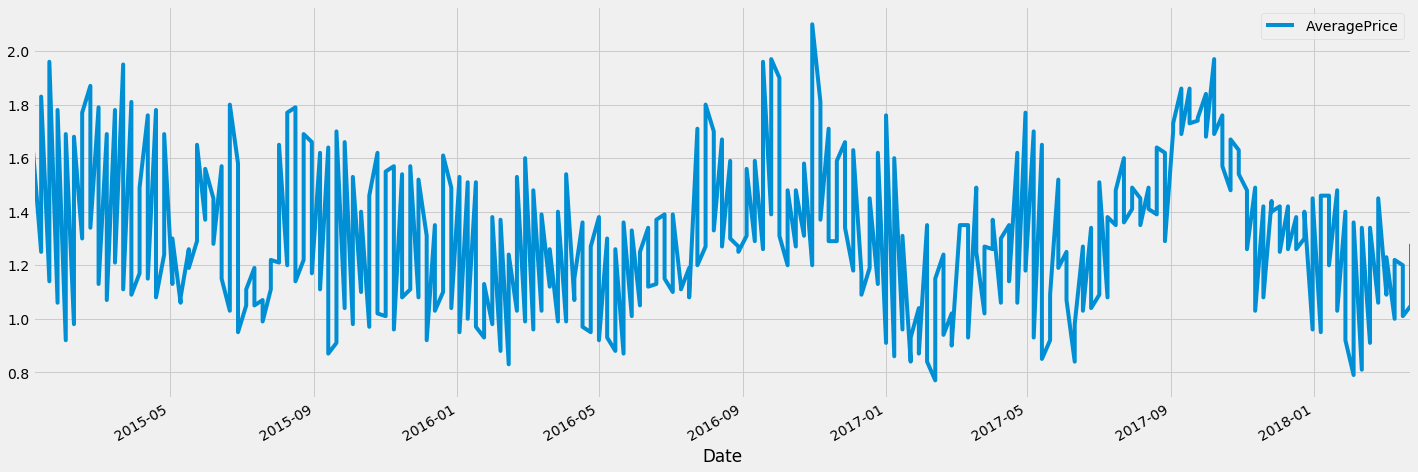

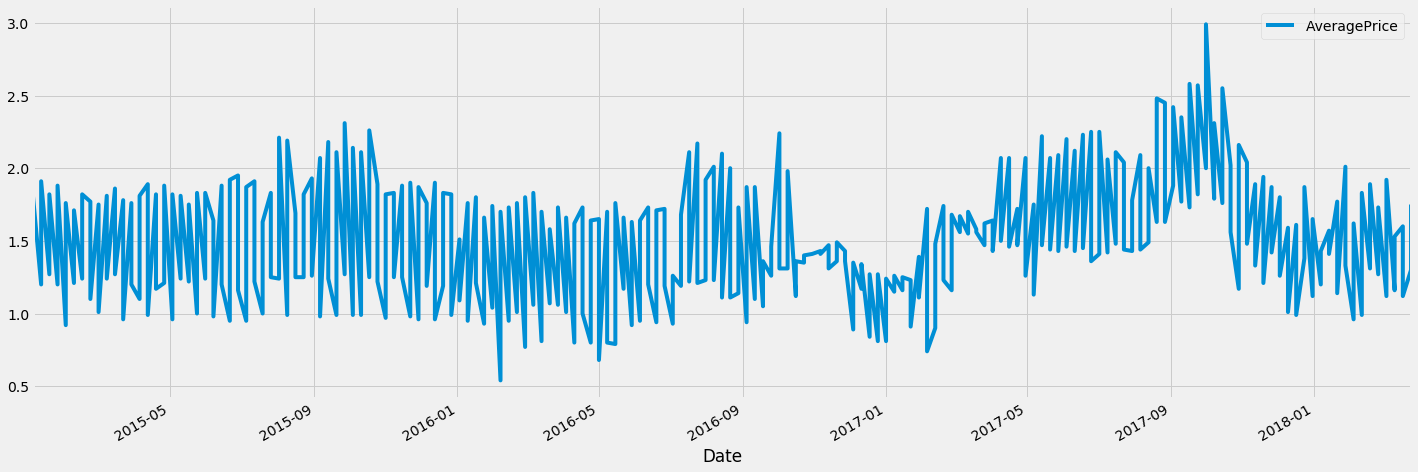

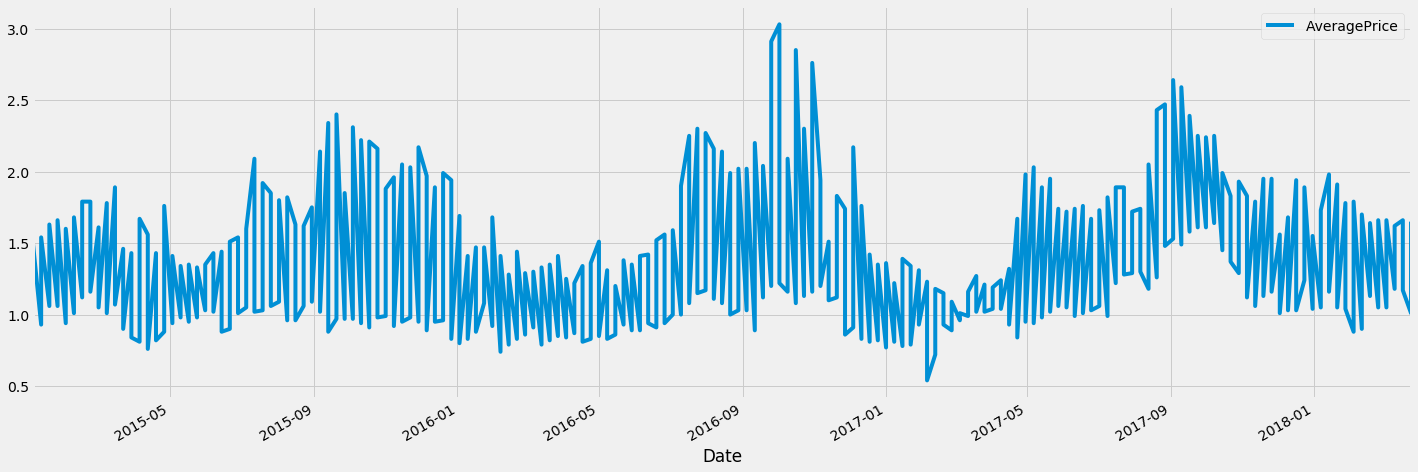

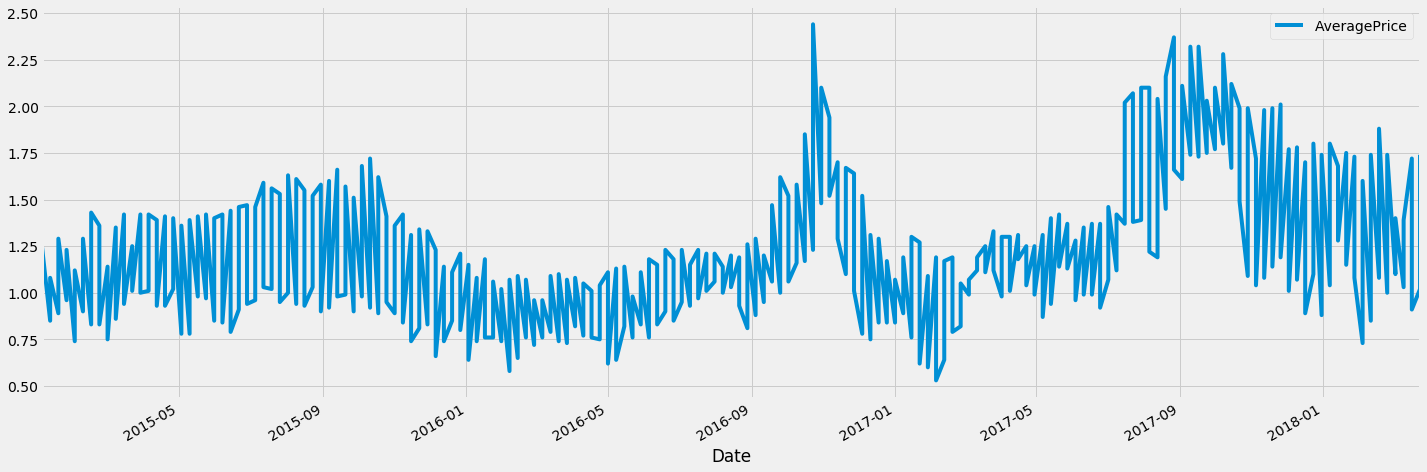

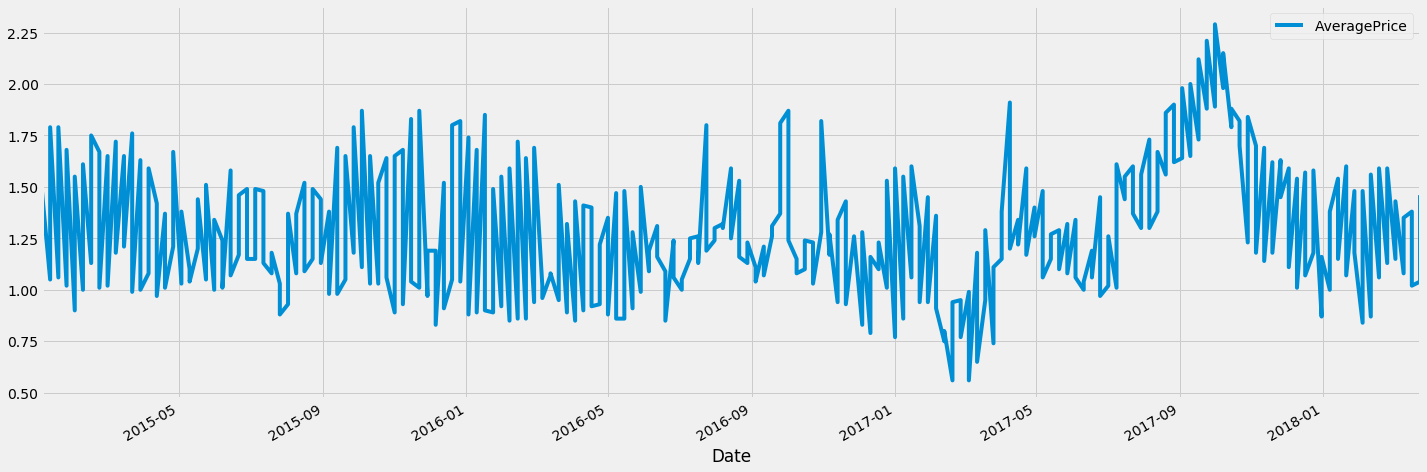

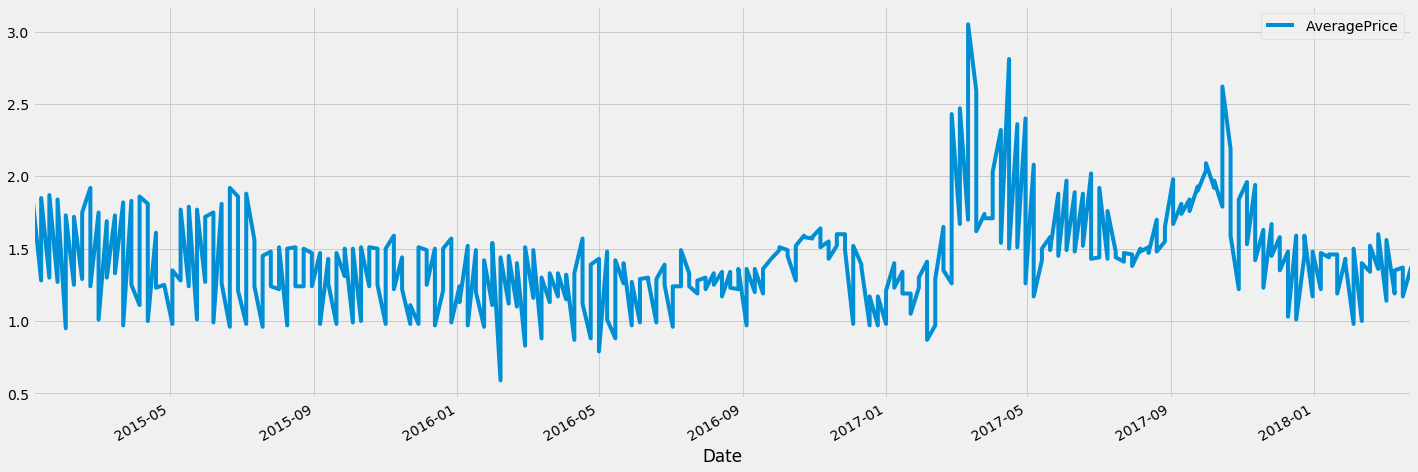

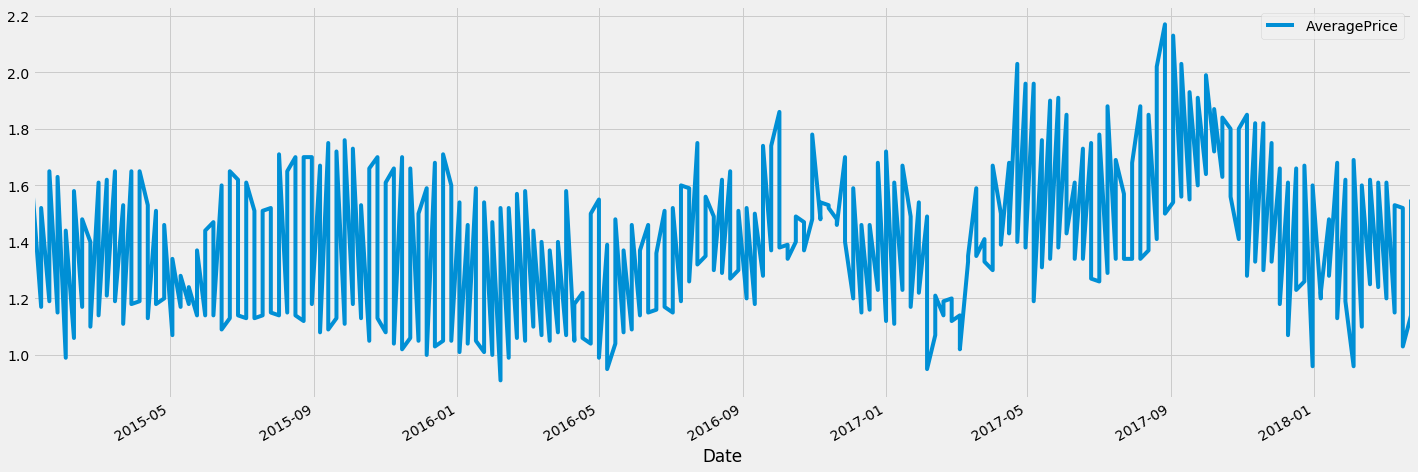

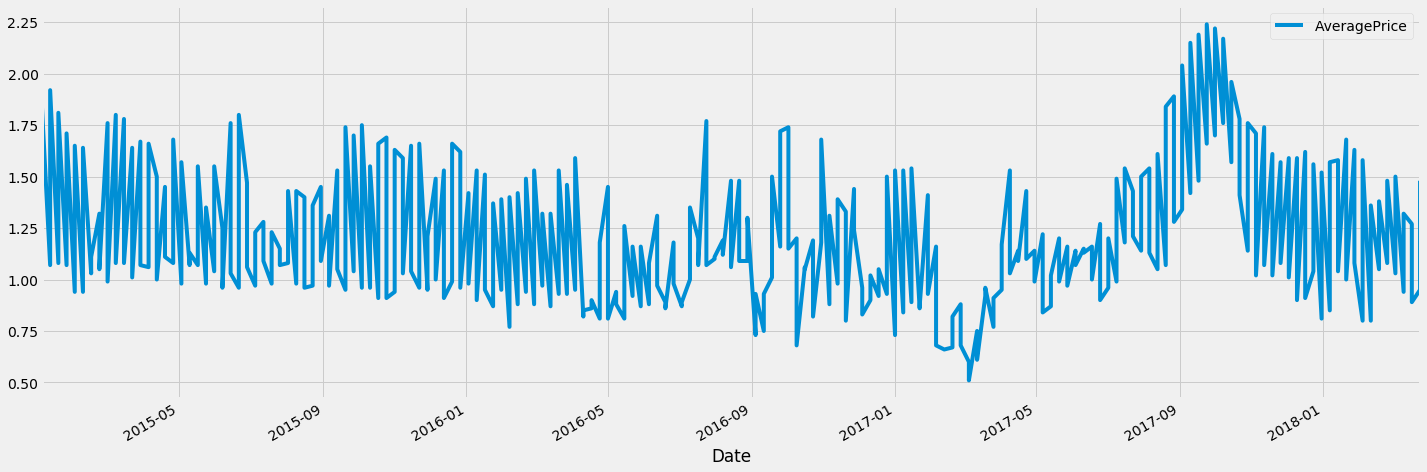

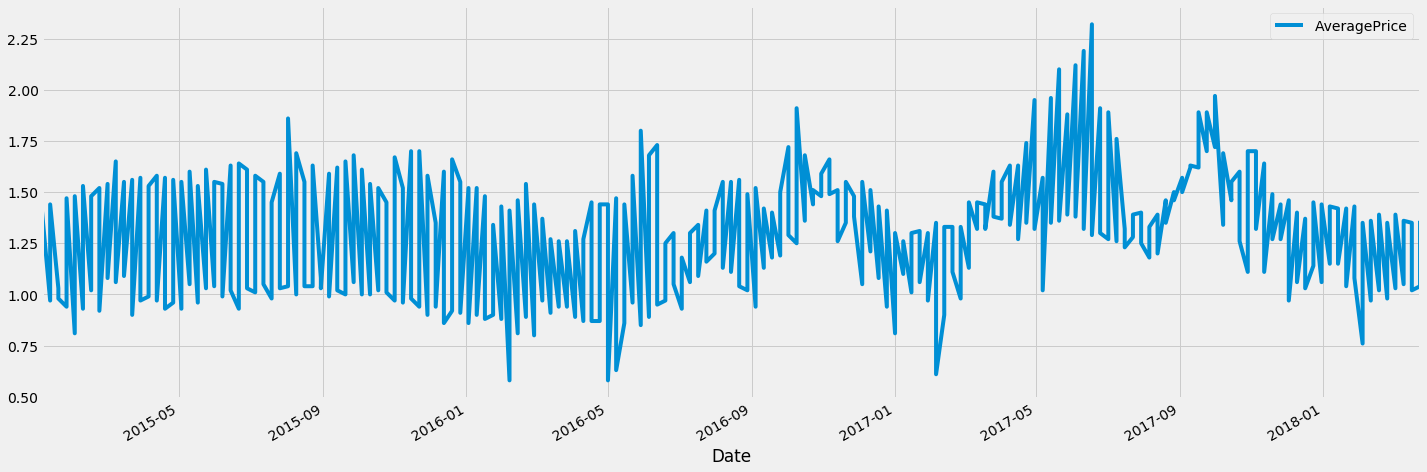

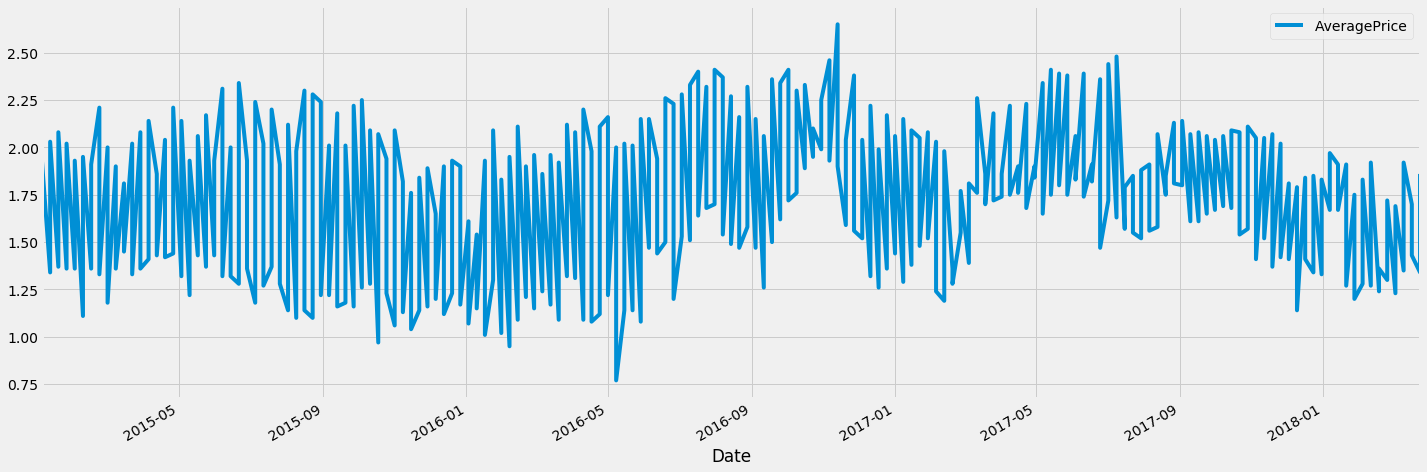

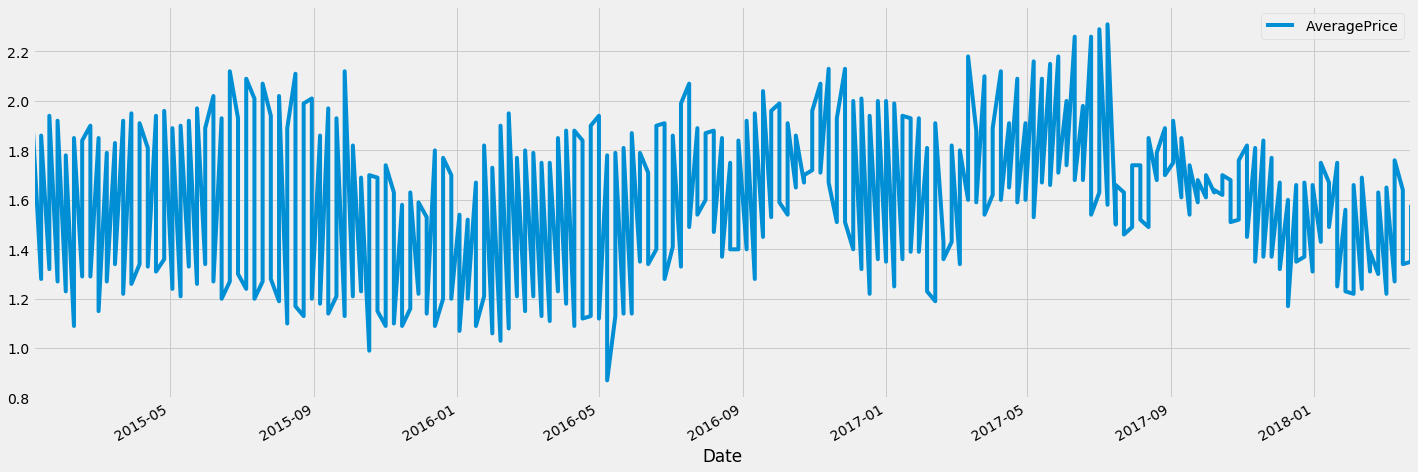

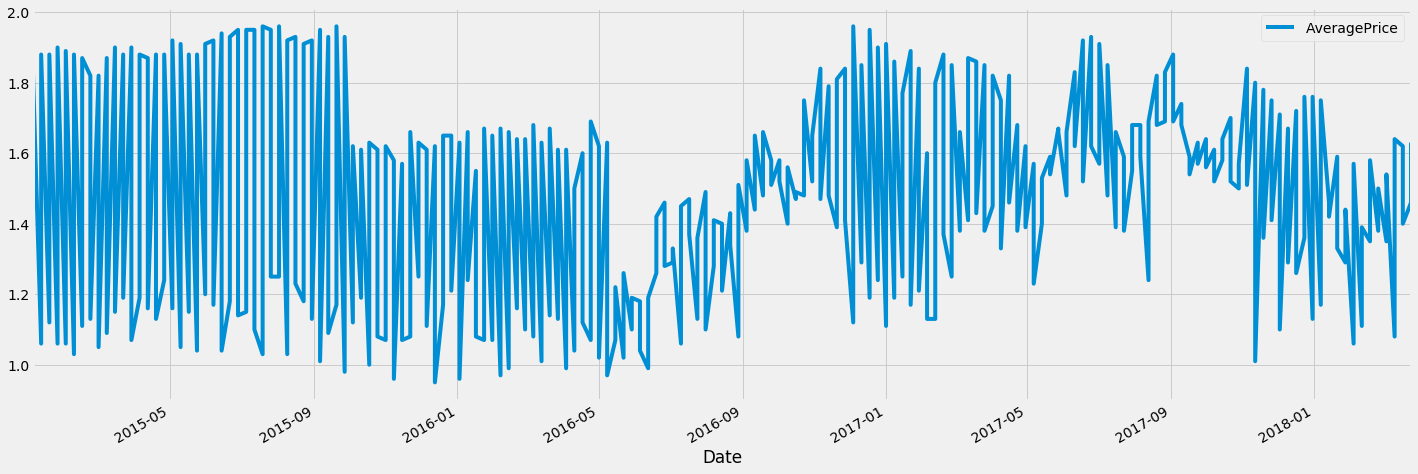

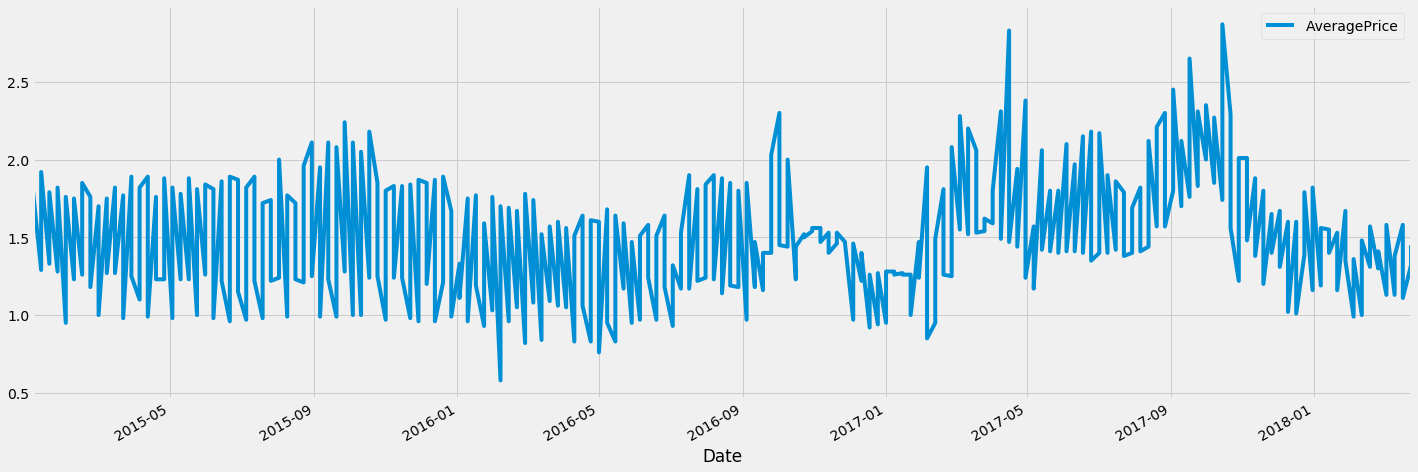

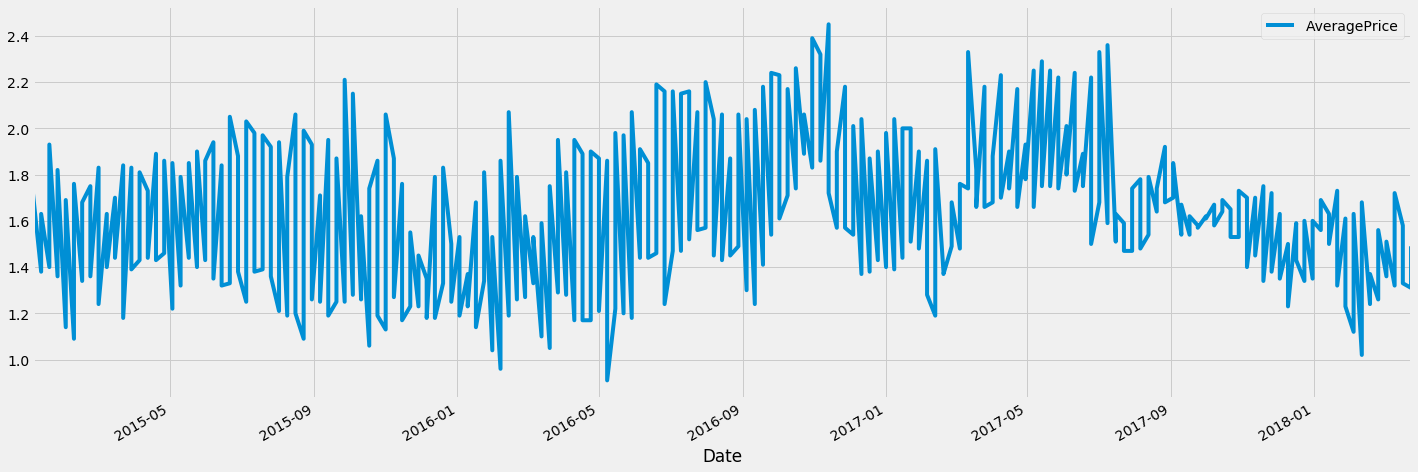

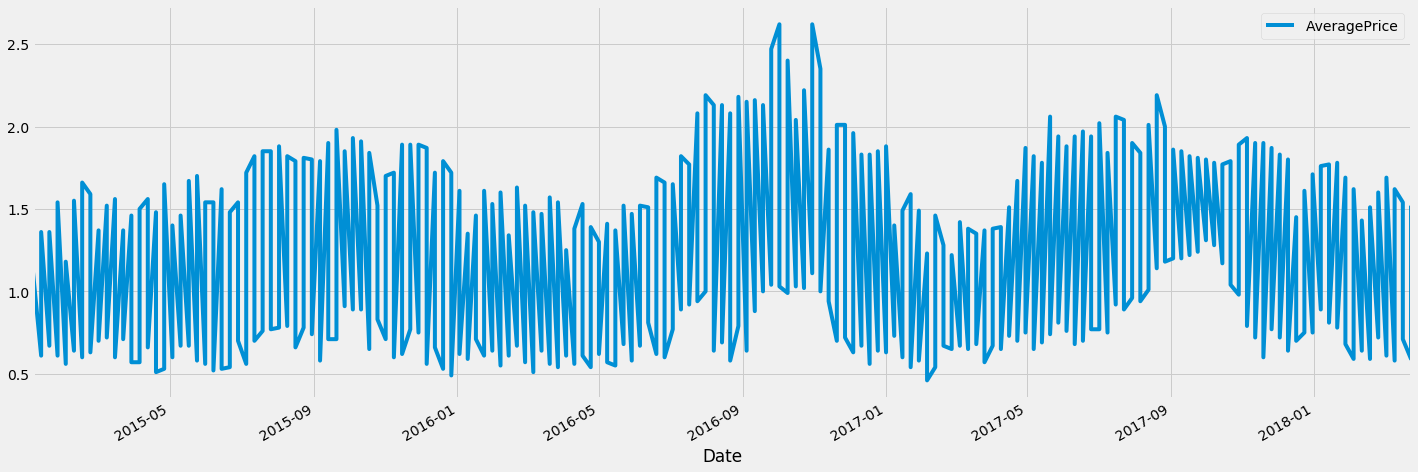

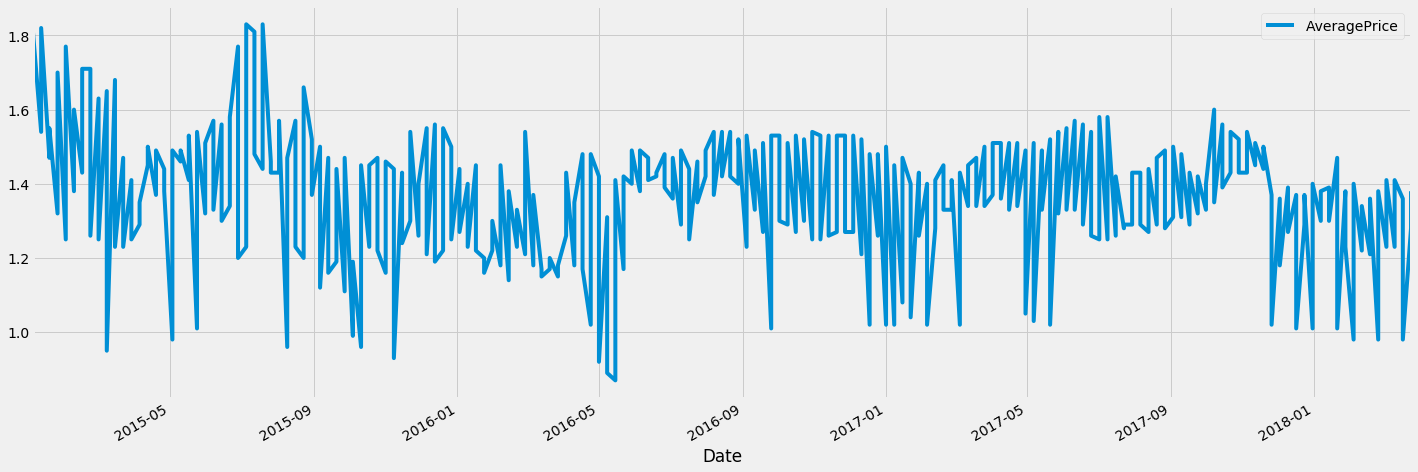

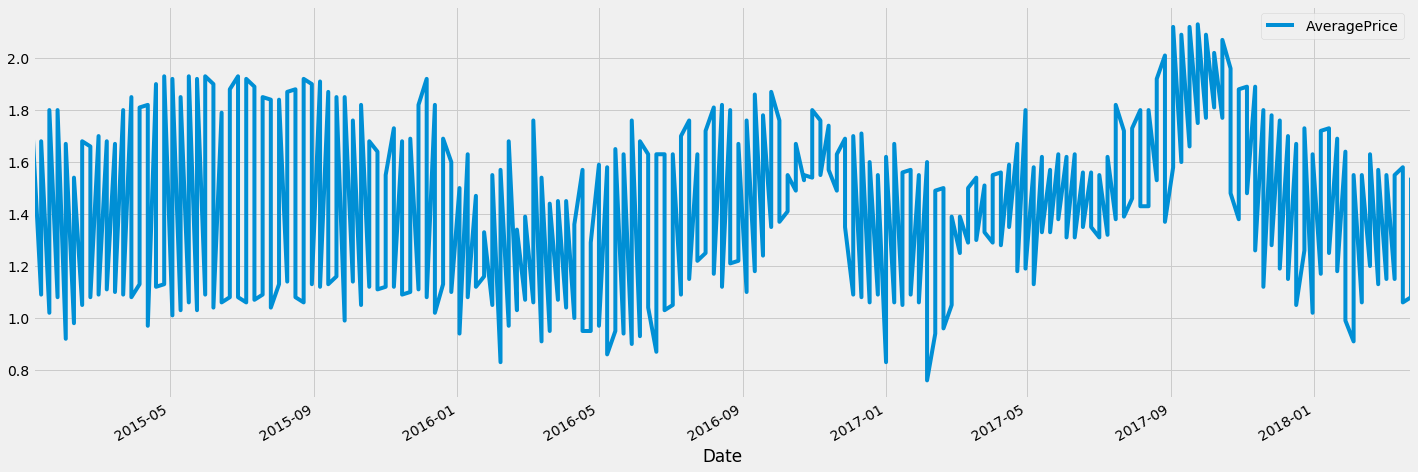

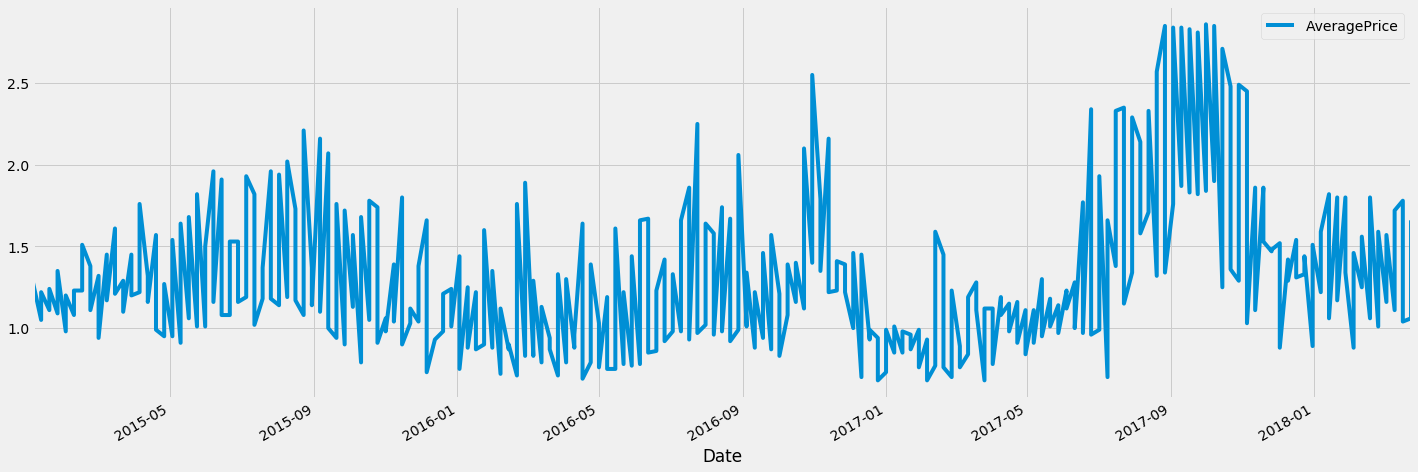

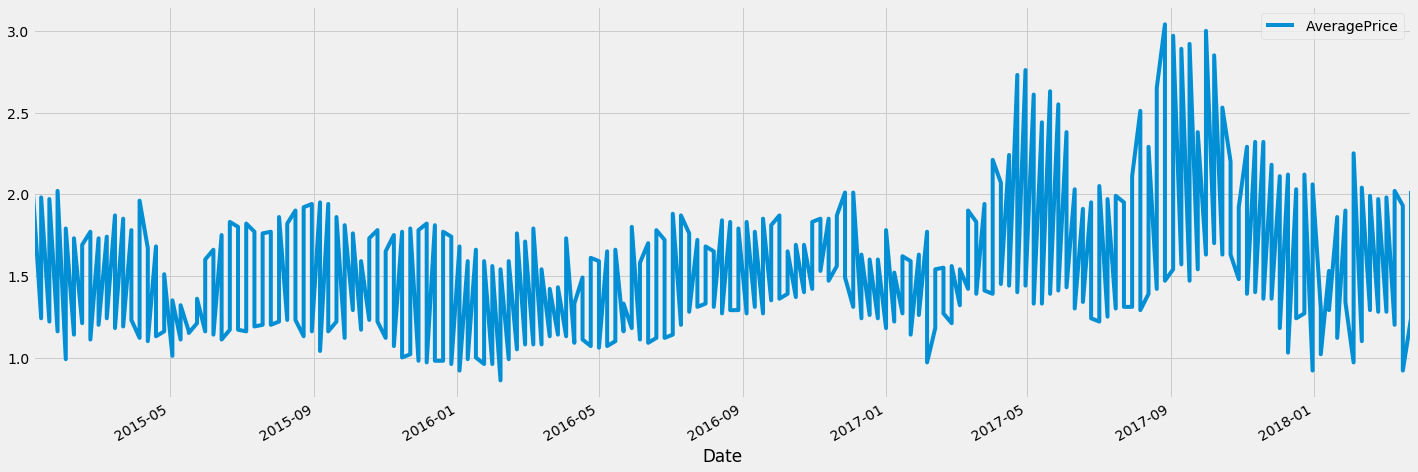

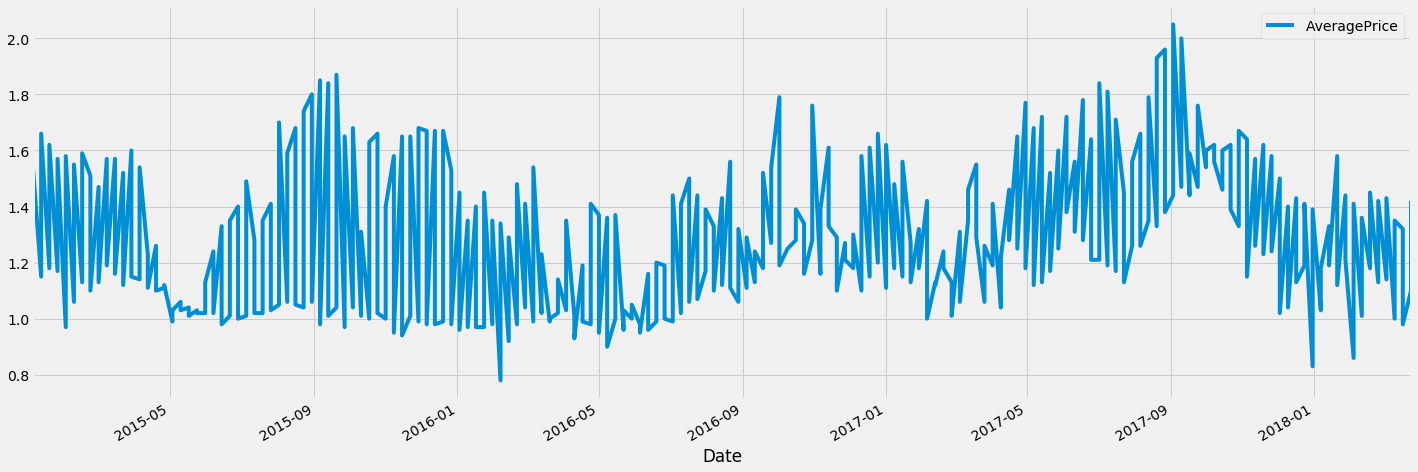

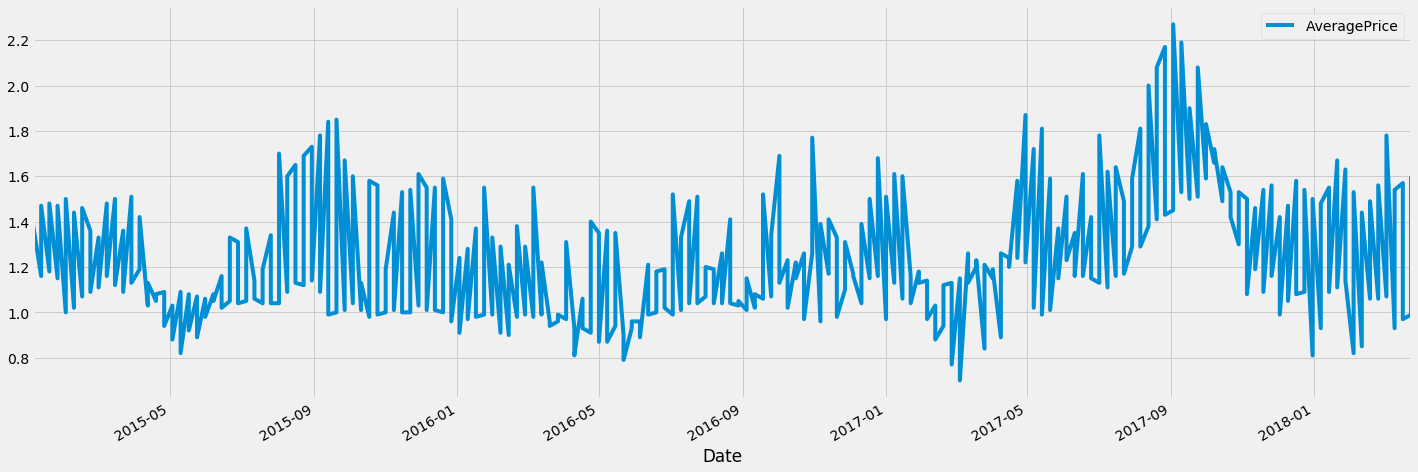

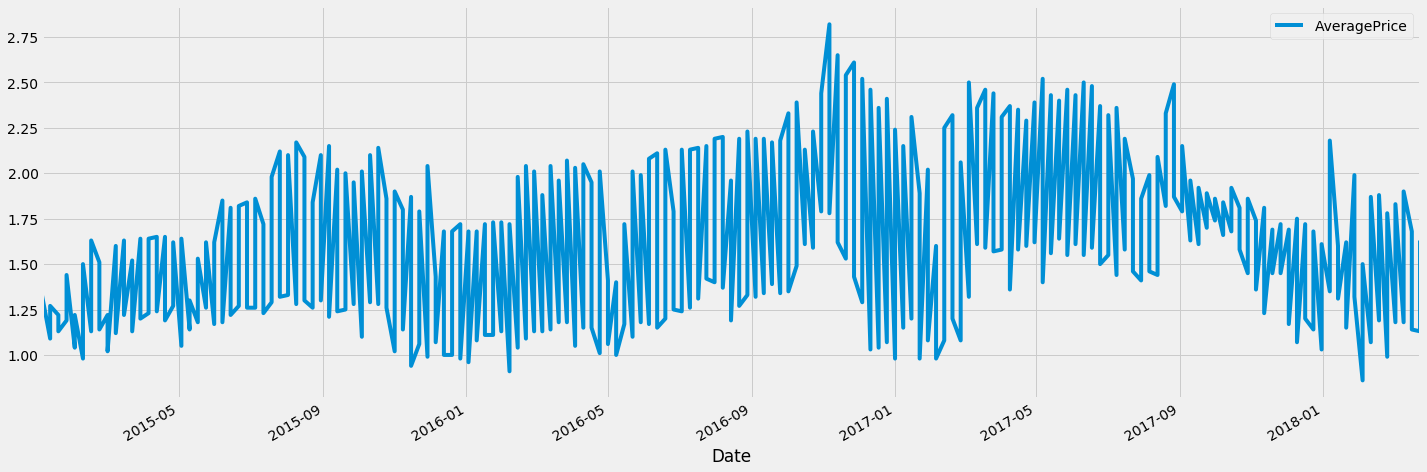

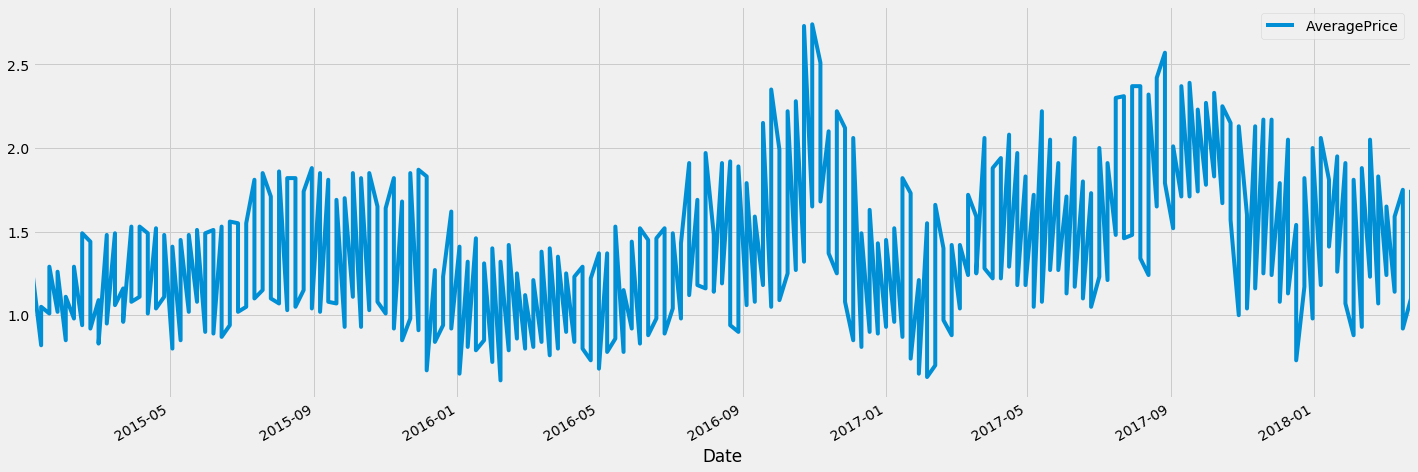

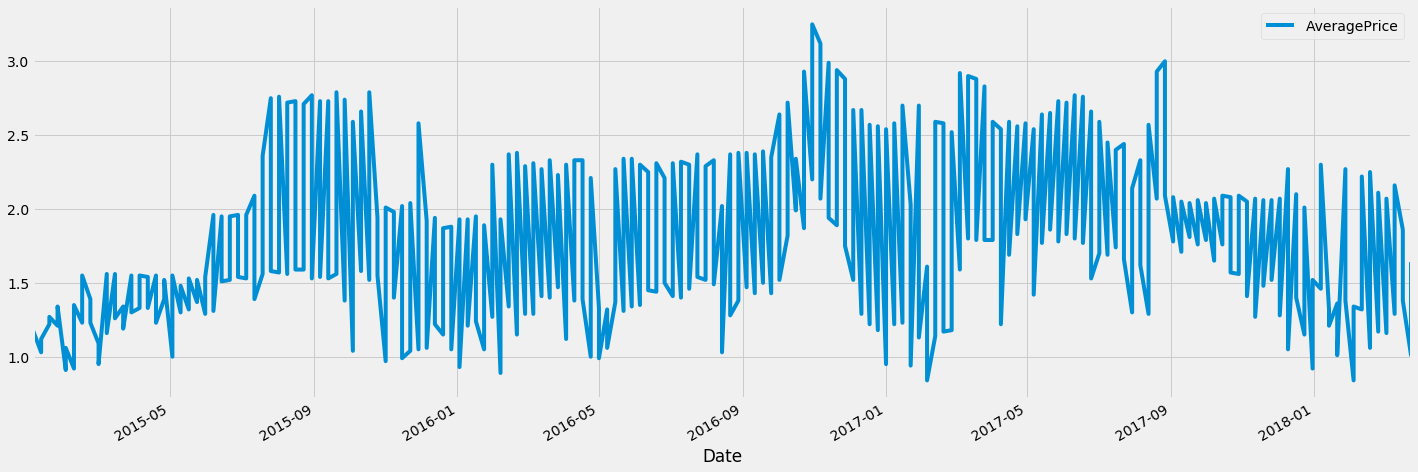

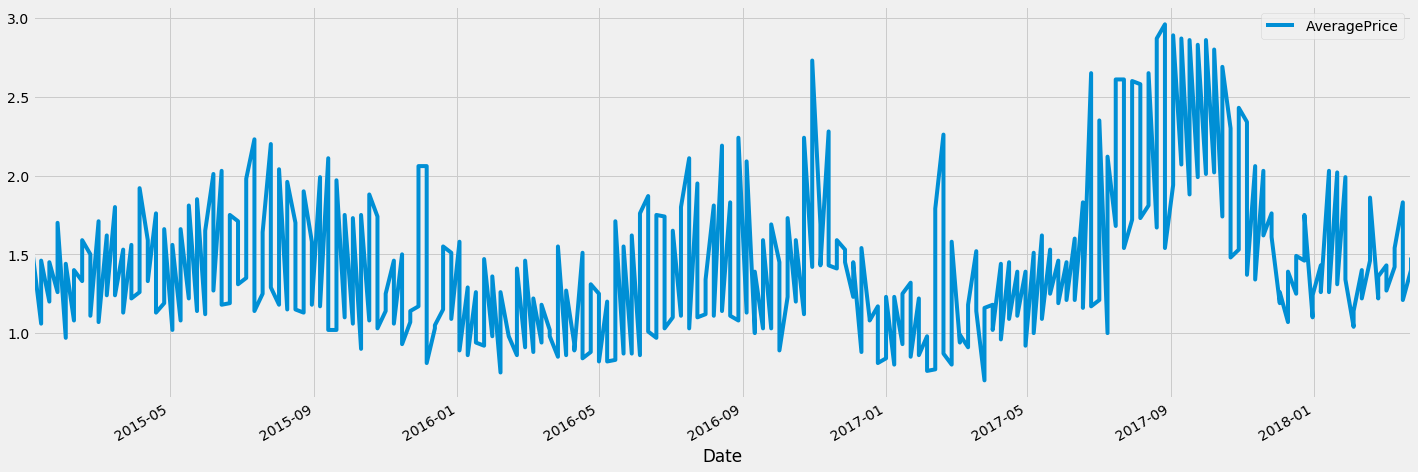

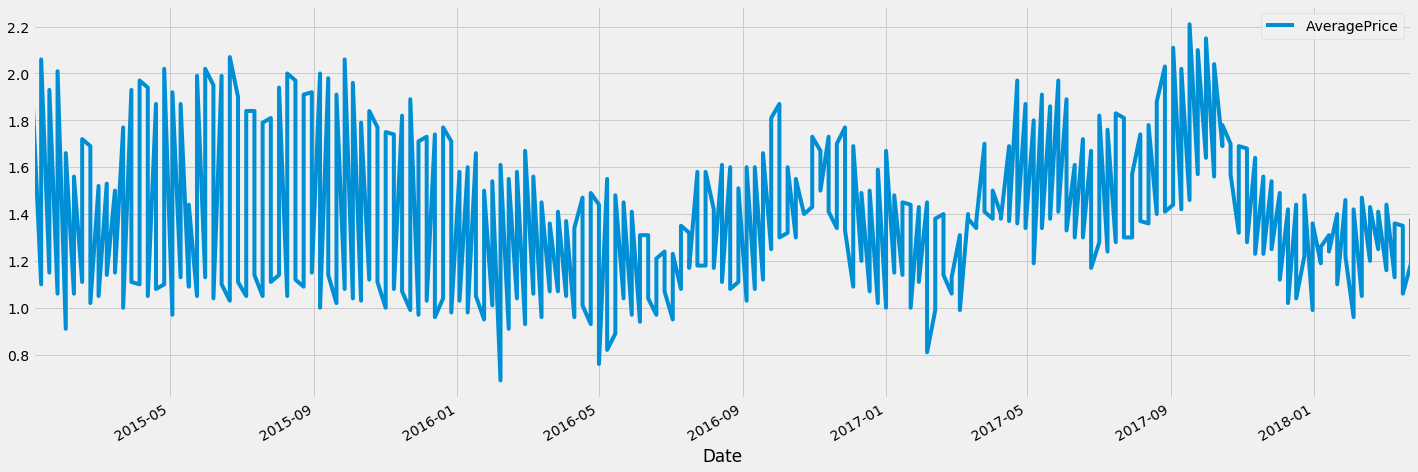

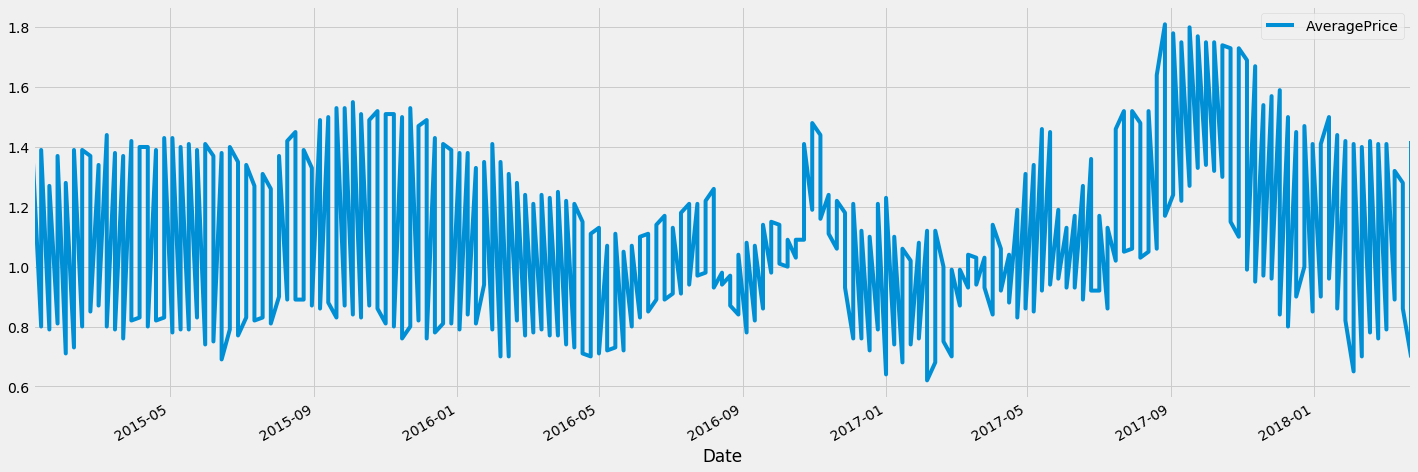

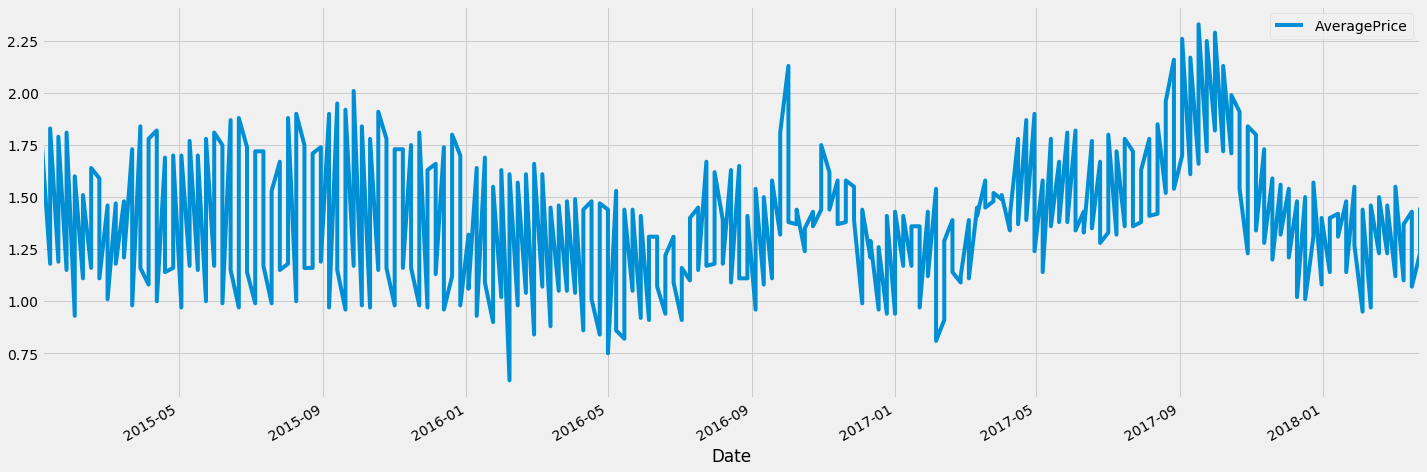

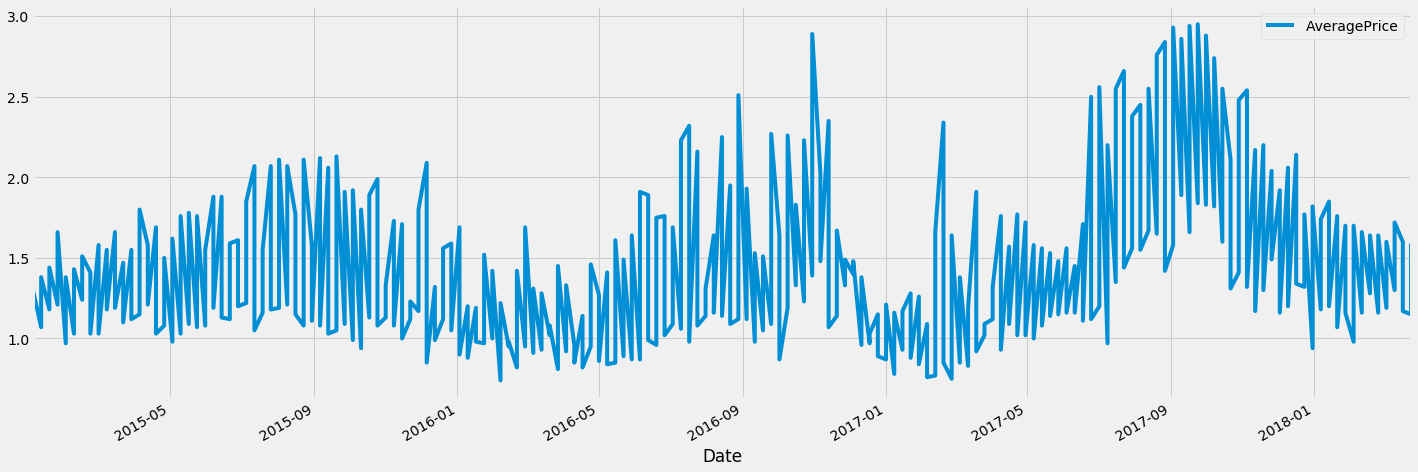

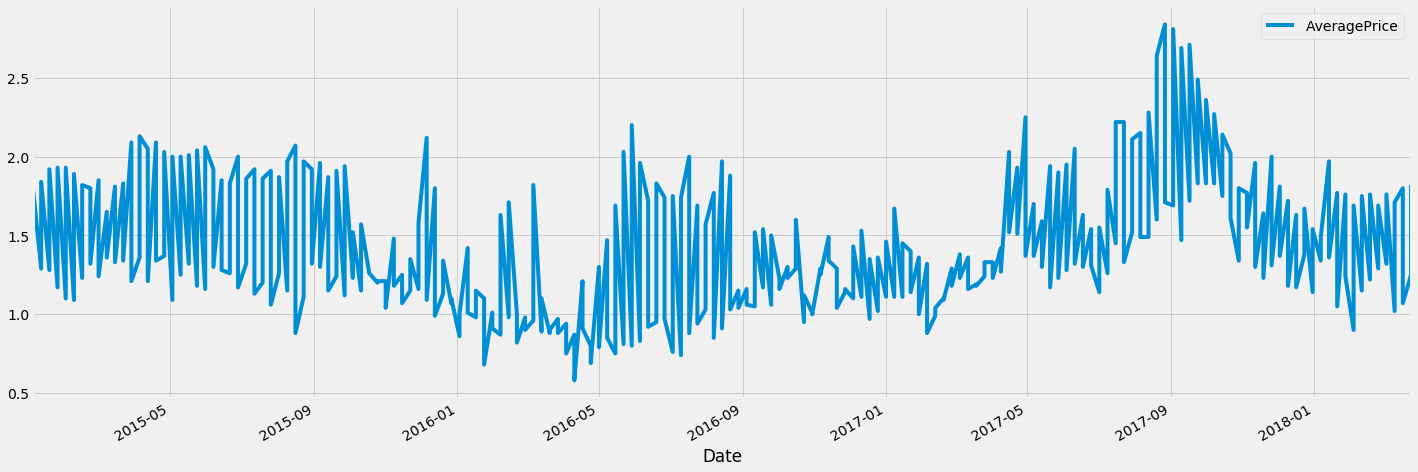

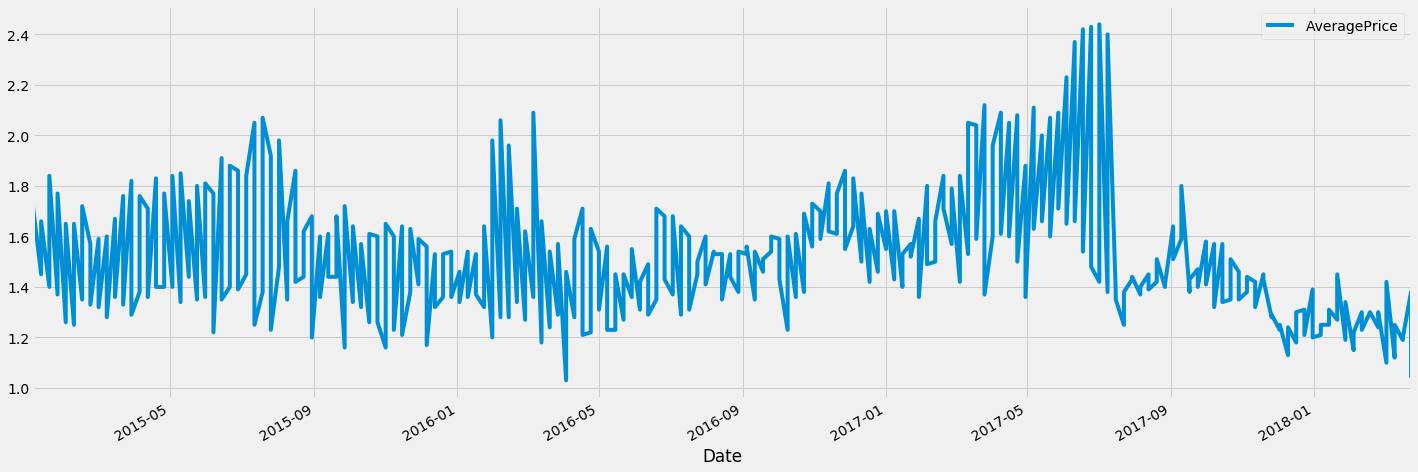

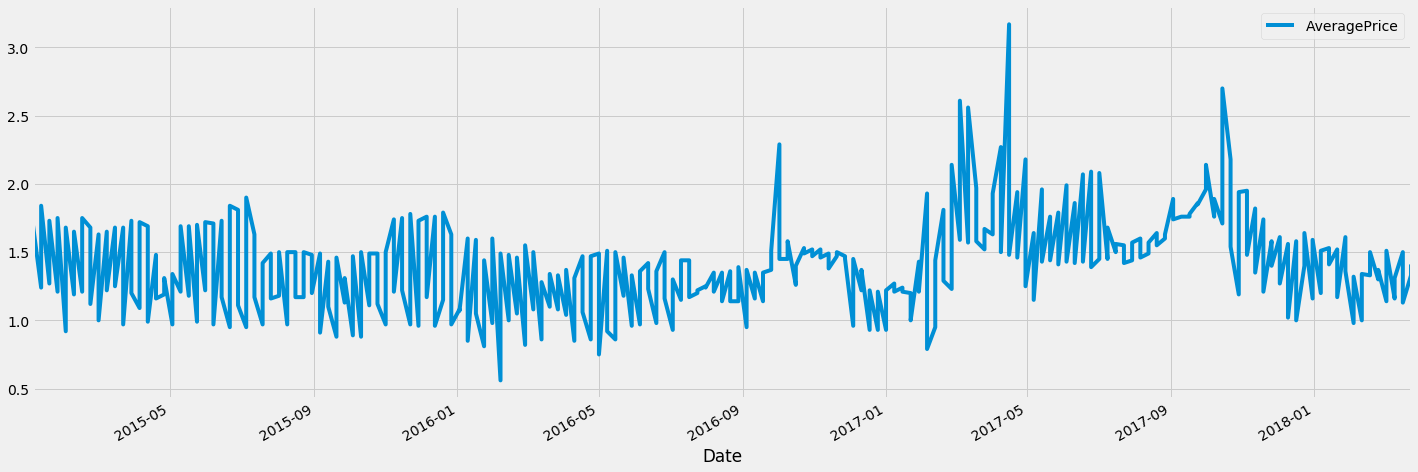

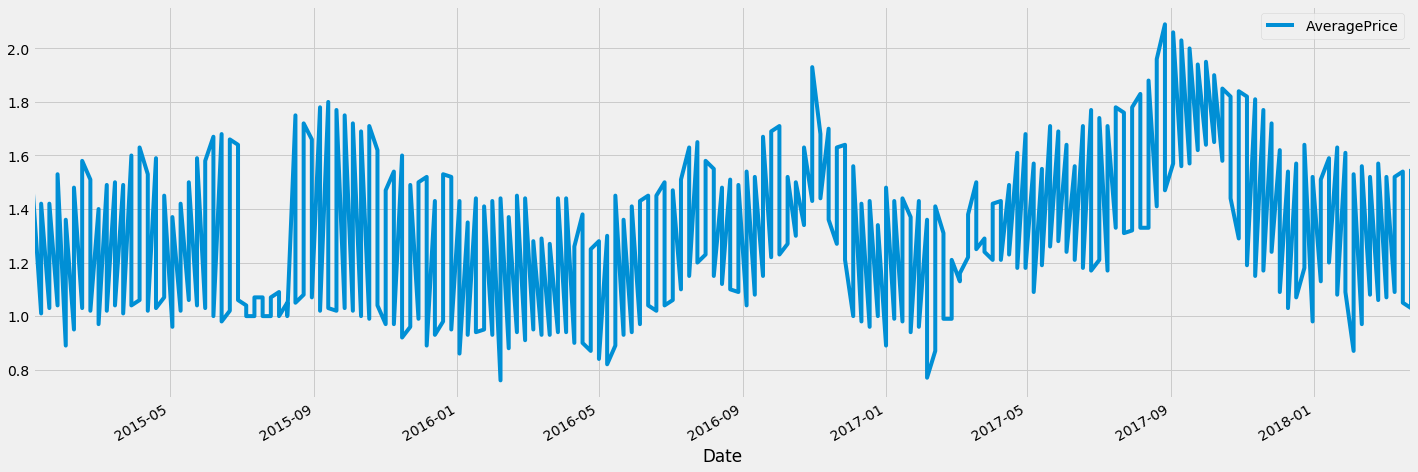

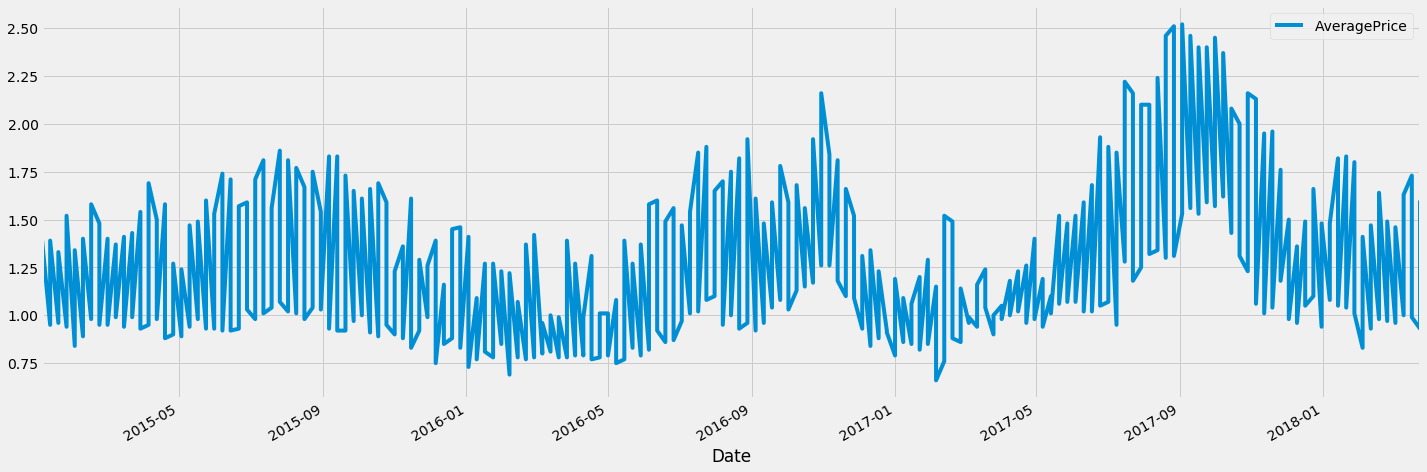

In [131]:
by_region.plot(figsize = (22,8))
plt.show()